

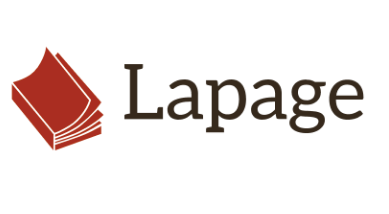

Lapage était originellement une librairie physique avec plusieurs points de vente. Mais devant le succès de certains de ses produits et l’engouement de ses clients, elle a décidé depuis 2 ans d’ouvrir un site de vente en ligne. L'entreprise souhaite faire le point après deux ans d’exercice, et pouvoir analyser ses points forts, ses points faibles, les comportements clients, etc.


# <a name="C">§</a> SOMMAIRE                    

## <a href="#A1">1. Préparation du jeu de données</a>
- <a href="#B1">1.1-DF customers</a>
- <a href="#B2">1.2-DF products</a>
- <a href="#B3">1.3-DF transactions</a>

## <a href="#A2">2. Analyse du jeu de données</a>
- <a href="#B4">2.1-DF customers</a>
- <a href="#B5">2.2-DF products</a>
- <a href="#B6">2.3-DF transactions</a>

## <a href="#A3">3. Analyse des ventes</a>
- <a href="#B7">3.1-Préparation du DF ventes</a>
- <a href="#B8">3.2-Analyse du chiffre d'affaire</a>
    - 3.2.2-Chiffre d'affaire journalier
    - 3.2.3-Chiffre d'affaire mensuel
    - 3.2.4-Recherche de l'anomalie
    - 3.2.5-Chiffre d'affaire journalier - moyenne glissante
    - 3.2.6-Chiffre d'affaire mensuel - moyenne glissante
    - 3.2.7-Chiffre d'affaire cumulé
- <a href="#B9">3.3-Analyse du volume des ventes</a>
    - 3.3.1-Analyse mensuelle
    - 3.3.1-Analyse journalière

## <a href="#A4">4. Analyse des produits vendus</a>
- 4.1-Répartition du chiffre d'affaire par catégorie
- 4.2-Classement des ventes
- 4.3-Les invendus

## <a href="#A5">5. Analyse des sessions d'achat</a>

## <a href="#A6">6. Analyse des clients</a>
- <a href="#B10">6.1-Répartition du chiffre d'affaire par client : courbe de Lorenz</a>
- <a href="#B11">6.2-Analyse quantitative des ventes par client</a>
- <a href="#B13">6.3-Analyse des ventes par âge</a> 
    - 6.3.1-Préparation du DF analyse_clients
    - 6.3.2-1ères analyses
    - 6.3.3-Analyse par tranche d'âge
- <a href="#B14">6.4-Analyse par genre</a> 

## <a href="#A7">7. Analyse clients-produits</a>
- <a href="#B19">7.1-Préparation du DF analyse_ventes</a>
- <a href="#B15">7.2-Analyse genre-catégorie</a> 
- <a href="#B16">7.3-Analyse âge-catégorie</a>  

## <a href="#A8">8. Fréquence d'achat</a>
- <a href="#B17">8.1-Fréquence d'achat en fonction de l'âge</a> 
- <a href="#B18">8.2-Fréquence d'achat en fonction du genre</a> 

## <a href="#A9">9. Correlations</a>
- <a href="#B20">9.1-Pairplot sur analyse_ventes</a>
- <a href="#B21">9.2-Pairplot sur analyse_clients</a>
- <a href="#B22">9.3-Corrélation CA - nombre de session</a>
- <a href="#B24">9.4-Corrélation tranche d'âge - catégorie</a>

## <a href="#A10">10. Test de normalité</a>






In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st
import statsmodels.api as sm

In [2]:
sns.set_style('darkgrid')

# <a name="A1">1- Préparation du jeu de données</a> <a href="#C">§</a>

##  <a name="B1">1.1 - DF customers</a> <a href="#C">§</a>

In [3]:
customers=pd.read_csv('customers.csv')

In [4]:
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [5]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


In [6]:
# J'ajoute une colonne âge, plus parlante que l'année de naissance
customers['age']=2022-customers['birth']    
# Je renomme les colonnes 
customers.rename(columns={"sex":"genre", "birth":"naissance"}, inplace = True)              
customers.head()

,client_id,genre,naissance,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [7]:
customers.describe(include='all')

,client_id,genre,naissance,age
count,8623,8623,8623.000000,8623.000000
unique,8623,2,NaN,NaN
top,c_4410,f,NaN,NaN
freq,1,4491,NaN,NaN
mean,NaN,NaN,1978.280877,43.719123
std,NaN,NaN,16.919535,16.919535
min,NaN,NaN,1929.000000,18.000000
25%,NaN,NaN,1966.000000,30.000000
50%,NaN,NaN,1979.000000,43.000000
75%,NaN,NaN,1992.000000,56.000000


**<u>CONCLUSION** 

Il n'y a aucun doublon, aucun NaN, le type des variables est cohérent.  
J'ajoute d'une colonne 'age' par commodité.

##  <a name="B2">1.2-DF products</a> <a href="#C">§</a>

In [8]:
products=pd.read_csv('products.csv')

In [9]:
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [10]:
# Je renomme les colonnes 
products.rename(columns={"price":"prix"}, inplace = True)              
products.head()

,id_prod,prix,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [11]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   prix     3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [12]:
products.describe(include='all')

,id_prod,prix,categ
count,3287,3287.000000,3287.000000
unique,3287,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.856641,0.370246
std,NaN,29.847908,0.615387
min,NaN,-1.000000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.060000,0.000000
75%,NaN,22.990000,1.000000


**🚩 Problème : présence d'un prix négatif**

In [13]:
products.loc[products['prix']<0]

,id_prod,prix,categ
731,T_0,-1.0,0


**<u>CONCLUSION**

Aucun doublon, aucun NaN, type des variables cohérent.  
Présence d'une référence index 731, dont le prix et négatif !!!

##  <a name="B3">1.3-DF transactions</a> <a href="#C">§</a>

In [14]:
transactions=pd.read_csv('transactions.csv')

In [15]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [16]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [17]:
transactions.duplicated().sum()

126

**🚩 Problème : présence de doublons**

In [18]:
transactions.loc[transactions.duplicated()==True]

,id_prod,date,session_id,client_id
27778,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
52424,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
96687,T_0,test_2021-03-01 02:30:02.237412,s_0,ct_1
130188,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
139339,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
...,...,...,...,...
653098,T_0,test_2021-03-01 02:30:02.237432,s_0,ct_0
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [19]:
# la transaction correspondant à la référence T_0 est un test le prix attribué à cette référence est -1.00.
transactions.loc[transactions['id_prod']=='T_0']

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [20]:
# Je supprime toutes les lignes correspondant T_0
transactions.drop(transactions.loc[transactions['id_prod']=='T_0'].index, axis=0, inplace=True)
transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [21]:
# Ainsi que la référence correspondante dans le df product
products=products.drop([731])

**🚩 Problème : format de l'heure**



In [22]:
transactions['date'] = pd.to_datetime(transactions['date'])
transactions['date'] = transactions['date'].dt.normalize()

In [23]:
transactions['date'].dtypes

dtype('<M8[ns]')

In [24]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232


**<u>CONCLUSION** 

Il n'y a plus de doublon et aucun NaN.  
Le type de la  variable 'date' objet a été changé en datetime.  
La référence correspondant à une transaction test a été supprimée dans les tables transactions et products.

#  <a name="A2">2-Analyse du jeu de données</a> <a href="#C">§</a>

## <a name="B4">2.1-DF customers</a> <a href="#C">§</a>

In [25]:
customers.head()

,client_id,genre,naissance,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [26]:
customers[['age']].describe()

,age
count,8623.000000
mean,43.719123
std,16.919535
min,18.000000
25%,30.000000
50%,43.000000
75%,56.000000
max,93.000000


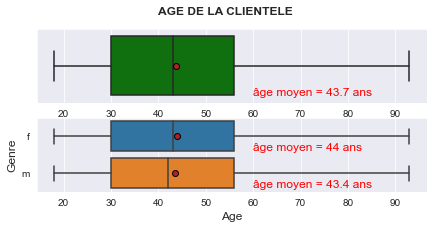

In [27]:
plt.figure(figsize=(7,3))
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
plt.suptitle('AGE DE LA CLIENTELE', fontsize=12,fontweight='bold')
plt.subplot(2,1,1).annotate('âge moyen = 43.7 ans', xy=(60, 0.4), xytext=(60, 0.4), color='r', fontsize=12)
sns.boxplot(x='age',data=customers, color='g',showmeans=True,meanprops=meanprops)
plt.subplot(2,1,2).annotate('âge moyen = 44 ans', xy=(60, 0.4), xytext=(60, 0.4), color='r', fontsize=12)
plt.subplot(2,1,2).annotate('âge moyen = 43.4 ans', xy=(60, 1.4), xytext=(60, 1.4), color='r', fontsize=12)
sns.boxplot(y='genre', x='age',data=customers,showmeans=True,meanprops=meanprops)
plt.ylabel("Genre",fontsize=12)
plt.xlabel("Age",fontsize=12)
plt.savefig("boxplot_age_clientele.png",dpi=300,bbox_inches = 'tight');

In [28]:
# analyse de l'âge de la clientèle en fonction du 'genre'.
customers.groupby('genre')['age'].describe()

,count,mean,std,min,25%,50%,75%,max
genre,,,,,,,,
f,4491.0,44.005121,17.098242,18.0,30.0,43.0,56.0,93.0
m,4132.0,43.408277,16.719656,18.0,30.0,42.0,56.0,93.0


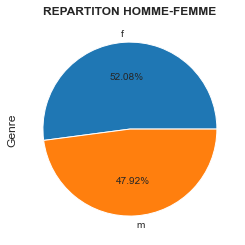

In [29]:
plt.title('REPARTITON HOMME-FEMME', fontsize=12,fontweight='bold')
customers['genre'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel("Genre",fontsize=12)
plt.savefig("pieplot_genre_clientele.png",dpi=300,bbox_inches = 'tight');

**<u>CONCLUSION**
    
La clientèle est composée de 8 623 clients : 4 491 femmes (52.08%) et 4 132 hommes (47.92%).  
La moyenne d'âge est de 43 ans (de 18 ans à 93 ans), 75% entre 18 et 56 ans.

## <a name="B5">2.2 - DF products</a> <a href="#C">§</a>

In [30]:
products.describe(include='all')

,id_prod,prix,categ
count,3286,3286.000000,3286.000000
unique,3286,NaN,NaN
top,0_1421,NaN,NaN
freq,1,NaN,NaN
mean,NaN,21.863597,0.370359
std,NaN,29.849786,0.615446
min,NaN,0.620000,0.000000
25%,NaN,6.990000,0.000000
50%,NaN,13.075000,0.000000
75%,NaN,22.990000,1.000000


In [31]:
products.head()

,id_prod,prix,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


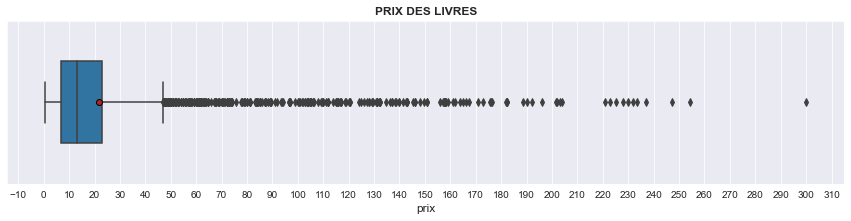

In [32]:
# boxplot sur la variable 'prix'
plt.figure(figsize=(15,3))
plt.locator_params(axis="x", nbins=50)
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
sns.boxplot(x='prix', orient='h',data=products, width=0.5, palette=sns.color_palette('tab10'), showmeans=True,meanprops=meanprops)
plt.title("PRIX DES LIVRES", fontweight='bold', fontsize=12)
plt.xlabel('prix',fontsize=12)
plt.savefig("prix_des_livres.png",dpi=300,bbox_inches = 'tight');

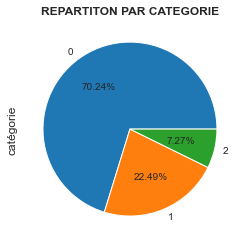

In [33]:
plt.title('REPARTITON PAR CATEGORIE', fontsize=12,fontweight='bold')
products['categ'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.ylabel("catégorie",fontsize=12)
plt.savefig("pieplot_categorie_livre.png",dpi=300);

###   <a name="D1">Il y a 3 catégories de livre. Y-a-t-il une relation entre l'appartenance à une catégorie et son prix ?</a>  
<a href="#D2">corrélations</a>

In [34]:
products.groupby(['categ']).describe()

prix                                                                
        count        mean        std    min      25%     50%      75%     max
categ                                                                        
0      2308.0   11.732795   7.565755   0.62   5.5875   10.32   16.655   40.99
1       739.0   25.531421  15.425162   2.00  13.3900   22.99   33.990   80.99
2       239.0  108.354686  49.561431  30.99  71.0650  101.99  136.530  300.00

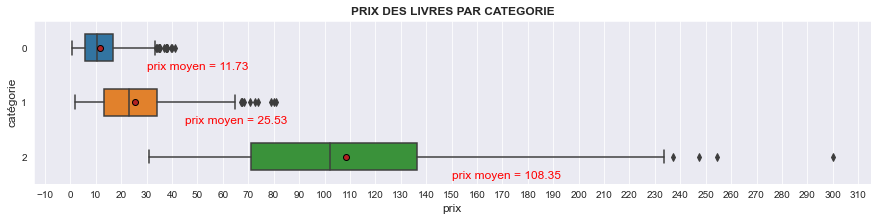

In [35]:
plt.figure(figsize=(15,3))
plt.locator_params(axis="x", nbins=50)
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
sns.boxplot(x='prix',y='categ', orient='h',data=products, width=0.5, palette=sns.color_palette('tab10'), showmeans=True,meanprops=meanprops)
plt.title("PRIX DES LIVRES PAR CATEGORIE", fontweight='bold', fontsize=12)
plt.xlabel('prix',fontsize=12)
plt.ylabel('catégorie',fontsize=12)
plt.annotate('prix moyen = 11.73', xy=(30, 0.4), xytext=(30, 0.4), color='r', fontsize=12)
plt.annotate('prix moyen = 25.53', xy=(45, 1.4), xytext=(45, 1.4), color='r', fontsize=12)
plt.annotate('prix moyen = 108.35', xy=(150, 2.4), xytext=(150, 2.4), color='r', fontsize=12)
plt.savefig("boxplot_prix_des_livres_par_categorie.png",dpi=300,bbox_inches = 'tight');

In [36]:
# Correlation entre une variable qualitative et une variable quantitative : analyse des variances, méthode ANOVA

X = "categ" # qualitative
Y = "prix" # quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
    
eta_squared(products[X],products[Y])
print("η2=", round(eta_squared(products[X],products[Y]),2))

η2= 0.7


η2 est proche de 1, comme on le pressentait d'après le boxplot, il y a bien une relation entre l'appartenance à une catégorie et le prix d'un livre.

**<u>CONCLUSION** 

Le fichier contient 3 287 références classées en 3 catégories :  
70.24% en categ 0 : 2 308 réfs, prix de 0.62 à 40.99  
22.49% en categ 1 : 739 refs, prix de 2.00 à 80.99  
7.27% en categ 2 : 239 refs, prix de 30.99 à 300.00  
Le prix moyen est de 21.85, 75% des produits coûtent entre 0.62 et 23.  
L'analyse des variance a permis de conclure qu'il existe un lien entre le prix d'un produit et son appartenance à une catégorie.

In [37]:
categ_0=products.loc[products['categ']==0]
categ_1=products.loc[products['categ']==1]
categ_2=products.loc[products['categ']==2]


## <a name="B6">2.3 - DF transactions</a> <a href="#C">§</a>

In [38]:
transactions.describe(include='all')

,id_prod,date,session_id,client_id
count,679332,679332,679332,679332
unique,3266,730,342315,8600
top,1_369,2021-09-30 00:00:00,s_118668,c_1609
freq,2252,1311,14,25488
first,NaN,2021-03-01 00:00:00,NaN,NaN
last,NaN,2023-02-28 00:00:00,NaN,NaN


In [39]:
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20,s_211425,c_103
1,1_251,2022-02-02,s_158752,c_8534
2,0_1277,2022-06-18,s_225667,c_6714
3,2_209,2021-06-24,s_52962,c_6941
4,0_1509,2023-01-11,s_325227,c_4232


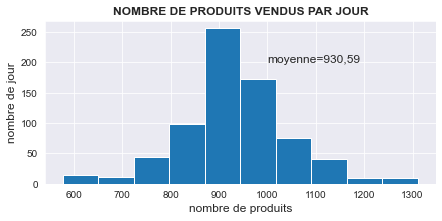

In [40]:
plt.figure(figsize=(7,3))
plt.title("NOMBRE DE PRODUITS VENDUS PAR JOUR", fontweight='bold', fontsize=12)
transactions.groupby('date').count()['id_prod'].plot(kind='hist')
plt.annotate('moyenne=930,59',xy=(1000,200),xytext=(1000,200),fontsize=12)
plt.xlabel('nombre de produits',fontsize=12)
plt.ylabel('nombre de jour',fontsize=12)

plt.savefig("Hist_transactions.png",dpi=300,bbox_inches = 'tight');

In [41]:
transactions.groupby('date').count()['id_prod'].mean()

930.5917808219178

**<u>CONCLUSION**

Sur 2 ans, 679 332  transactions ont été réalisées avec 3 266 produits différents(sur 3 287 référencés).  
Il y a donc 21 produits invendus.   
Le best-seller a été vendu 2 252 fois (id :1_369, catégorie 1).  
Chaque jour, il se vend en moyenne 930 produits.  
Ces ventes ont été réalisées par 8 600 clients sur 8 623 inscrits, il y a donc 23 clients inactifs.


# <a name="A3">3 - Analyse des ventes</a> <a href="#C">§</a>

Pour continuer l'exploration, je souhaite enrichir les données sur les transactions, des caractéristiques produits. Ainsi il sera possible d'analyser les indicateurs liés au chiffre d'affaire et sa répartition en fonction des articles.

## <a name="B7">3.1 - Préparation du DF ventes</a> <a href="#C">§</a>

In [42]:
# je réalise une fusion entre les df products et transactions sur id_products axées sur transactions
ventes =pd.merge(products, transactions, on = 'id_prod', how = 'right')

In [43]:
ventes.head()

,id_prod,prix,categ,date,session_id,client_id
0,0_1518,4.18,0.0,2022-05-20,s_211425,c_103
1,1_251,15.99,1.0,2022-02-02,s_158752,c_8534
2,0_1277,7.99,0.0,2022-06-18,s_225667,c_6714
3,2_209,69.99,2.0,2021-06-24,s_52962,c_6941
4,0_1509,4.99,0.0,2023-01-11,s_325227,c_4232


In [44]:
ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679331
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   prix        679111 non-null  float64       
 2   categ       679111 non-null  float64       
 3   date        679332 non-null  datetime64[ns]
 4   session_id  679332 non-null  object        
 5   client_id   679332 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 36.3+ MB


In [45]:
ventes.isna().sum()

id_prod         0
prix          221
categ         221
date            0
session_id      0
client_id       0
dtype: int64

**🚩 Il y a 221 valeurs manquantes.**

In [46]:
# les valeurs manquantes correspondent à une seule référence.
ventes.loc[ventes['prix'].isnull(),:]

,id_prod,prix,categ,date,session_id,client_id
2633,0_2245,NaN,NaN,2022-09-23,s_272266,c_4746
10103,0_2245,NaN,NaN,2022-07-23,s_242482,c_6713
11723,0_2245,NaN,NaN,2022-12-03,s_306338,c_5108
15670,0_2245,NaN,NaN,2021-08-16,s_76493,c_1391
16372,0_2245,NaN,NaN,2022-07-16,s_239078,c_7954
...,...,...,...,...,...,...
669533,0_2245,NaN,NaN,2021-08-25,s_80395,c_131
670484,0_2245,NaN,NaN,2022-03-06,s_175311,c_4167
671088,0_2245,NaN,NaN,2022-05-16,s_209381,c_4453
675480,0_2245,NaN,NaN,2022-02-11,s_163405,c_1098


In [47]:
# La référence 0_2245 ne figure pas dans le dataframe products
products.loc[products['id_prod']=='0_2245']

,id_prod,prix,categ


In [48]:
transactions.loc[transactions['id_prod']=='0_2245']

,id_prod,date,session_id,client_id
2633,0_2245,2022-09-23,s_272266,c_4746
10106,0_2245,2022-07-23,s_242482,c_6713
11727,0_2245,2022-12-03,s_306338,c_5108
15675,0_2245,2021-08-16,s_76493,c_1391
16377,0_2245,2022-07-16,s_239078,c_7954
...,...,...,...,...
669730,0_2245,2021-08-25,s_80395,c_131
670682,0_2245,2022-03-06,s_175311,c_4167
671286,0_2245,2022-05-16,s_209381,c_4453
675679,0_2245,2022-02-11,s_163405,c_1098


La référence 0_2245 n'est pas présente dans la table products et n'a donc pas de prix ni de catégorie. Elle représente 221 ventes, il ne serait donc pas négligeable de la supprimer. Je vais lui attribuer la moyenne des prix pour ne pas fausser les calculs et lui attribuer arbitrairement la catégorie qui semble le mieux correspondre à ce prix.

In [49]:
ventes.loc[ventes['id_prod']=='0_2245']

,id_prod,prix,categ,date,session_id,client_id
2633,0_2245,NaN,NaN,2022-09-23,s_272266,c_4746
10103,0_2245,NaN,NaN,2022-07-23,s_242482,c_6713
11723,0_2245,NaN,NaN,2022-12-03,s_306338,c_5108
15670,0_2245,NaN,NaN,2021-08-16,s_76493,c_1391
16372,0_2245,NaN,NaN,2022-07-16,s_239078,c_7954
...,...,...,...,...,...,...
669533,0_2245,NaN,NaN,2021-08-25,s_80395,c_131
670484,0_2245,NaN,NaN,2022-03-06,s_175311,c_4167
671088,0_2245,NaN,NaN,2022-05-16,s_209381,c_4453
675480,0_2245,NaN,NaN,2022-02-11,s_163405,c_1098


In [50]:
# moyenne des prix des produits
round(products['prix'].mean(),2)

21.86

In [51]:
x=round(products['prix'].mean(),2)
ventes['prix'].fillna(x, inplace=True) 

In [52]:
# D'après le boxplot réalisé le prix de 21.86 correspond à un livre de catégorie 1
ventes['categ'].fillna('1', inplace=True)   

In [53]:
ventes.loc[ventes['id_prod']=='0_2245']

,id_prod,prix,categ,date,session_id,client_id
2633,0_2245,21.86,1,2022-09-23,s_272266,c_4746
10103,0_2245,21.86,1,2022-07-23,s_242482,c_6713
11723,0_2245,21.86,1,2022-12-03,s_306338,c_5108
15670,0_2245,21.86,1,2021-08-16,s_76493,c_1391
16372,0_2245,21.86,1,2022-07-16,s_239078,c_7954
...,...,...,...,...,...,...
669533,0_2245,21.86,1,2021-08-25,s_80395,c_131
670484,0_2245,21.86,1,2022-03-06,s_175311,c_4167
671088,0_2245,21.86,1,2022-05-16,s_209381,c_4453
675480,0_2245,21.86,1,2022-02-11,s_163405,c_1098


In [54]:
# Une fois les valeurs manquantes remplacées, je peux modifier le type de la colonne 'categ'
ventes['categ'] = ventes['categ'].astype('int64')

In [55]:
# Je rajoute la colonne 'periode' pour faciliter l'analyse
ventes['periode']=ventes['date'].dt.to_period('M')

Le DF ventes est nettoyé et complet, il peut être utilisé pour l'analyse.

## <a name="B8">3.2 - Analyse du chiffre d'affaire</a> <a href="#C">§</a> 

In [56]:
ventes.head()

,id_prod,prix,categ,date,session_id,client_id,periode
0,0_1518,4.18,0,2022-05-20,s_211425,c_103,2022-05
1,1_251,15.99,1,2022-02-02,s_158752,c_8534,2022-02
2,0_1277,7.99,0,2022-06-18,s_225667,c_6714,2022-06
3,2_209,69.99,2,2021-06-24,s_52962,c_6941,2021-06
4,0_1509,4.99,0,2023-01-11,s_325227,c_4232,2023-01


### 3.2.1 - Chiffre d'affaire annuel

In [57]:
# Chiffre d'affaire depuis le lancement du site du 01-03-2021 au 28-02-2023
CA_total=ventes['prix'].sum()
print("Chiffre d'affaire réalisé du 01-03-2021 au 28-02-2023:", CA_total)

Chiffre d'affaire réalisé du 01-03-2021 au 28-02-2023: 11858559.74


In [58]:
# Chiffre d'affaire 1ère année du site du 01-03-2021 au 28-02-2022
CA_1ere_annee=round(ventes.loc[ventes['date']<'2022-03-01']['prix'].sum(),2)
print("Chiffre d'affaire réalisé du 01-03-2021 au 28-02-2022:", CA_1ere_annee)

Chiffre d'affaire réalisé du 01-03-2021 au 28-02-2022: 5833988.63


In [59]:
# Chiffre d'affaire 2ème année du site du 01-03-2022 au 28-02-2023
CA_2eme_annee=round(ventes.loc[(ventes['date']>'2022-02-28')]['prix'].sum(),2)
print("Chiffre d'affaire réalisé du 01-03-2022 au 28-02-2023:", CA_2eme_annee)

Chiffre d'affaire réalisé du 01-03-2022 au 28-02-2023: 6024571.11


In [60]:
# augmentation
augmentation=round((CA_2eme_annee-CA_1ere_annee)/CA_1ere_annee*100,2)
print("Soit un augmentation de:", augmentation,'%')

Soit un augmentation de: 3.27 %


In [61]:
# représentation graphique de l'évolution du CA
df_graphe_CA= pd.DataFrame({'annee':['1ere','2eme'],"chiffre d'affaire": [5833988.63,6024571.11]})
df_graphe_CA

,annee,chiffre d'affaire
0,1ere,5833988.63
1,2eme,6024571.11


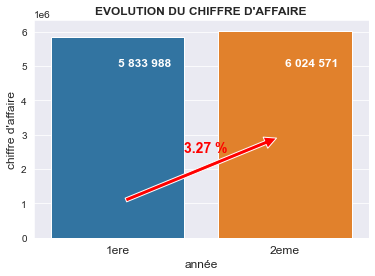

In [62]:
sns.barplot(x='annee', y="chiffre d'affaire", data=df_graphe_CA)
plt.title("EVOLUTION DU CHIFFRE D'AFFAIRE", fontweight='bold', fontsize='12')
plt.xlabel('année',fontsize=12)
plt.ylabel("chiffre d'affaire",fontsize=12)
plt.xticks( fontsize=12)
plt.annotate('5 833 988', xy=(0, 5000000), xytext=(0, 5000000), color='w', fontsize=12, fontweight='bold')
plt.annotate('6 024 571', xy=(1, 5000000), xytext=(1, 5000000), color='w', fontsize=12, fontweight='bold')
plt.annotate('', xy=(1, 3000000), xytext=(0, 1000000), arrowprops=dict(facecolor='r', shrink=0.05))
plt.annotate('3.27 %', xy=(0.4, 2500000), xytext=(0.4, 2500000), color='r', fontsize=14, fontweight='bold')
plt.savefig("Hist_evol_CA.png",dpi=300,bbox_inches = 'tight');

### 3.2.2 - Chiffre d'affaire journalier

In [63]:
CA_jour=ventes.groupby('date').sum()[['prix']]
CA_jour= CA_jour.rename(columns = {'prix':'CA'})
CA_jour.head()

,CA
date,
2021-03-01,16587.08
2021-03-02,15508.31
2021-03-03,15198.69
2021-03-04,15196.07
2021-03-05,17471.37


In [64]:
CA_jour.describe()

,CA
count,730.000000
mean,16244.602384
std,1848.339067
min,8076.040000
25%,15477.805000
50%,16235.435000
75%,17197.347500
max,20509.540000


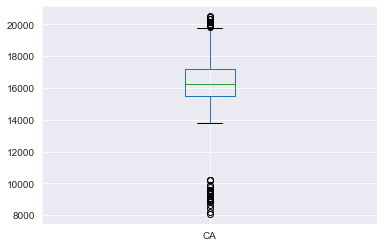

In [65]:
CA_jour.boxplot('CA');
# le CA est assez régulier, 16 244 par jour en moyenne.

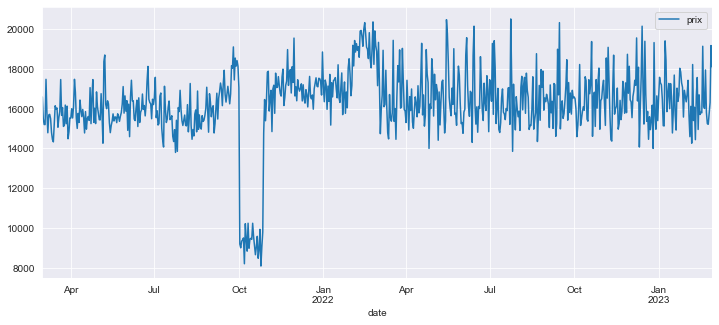

In [66]:
 ventes.groupby('date').sum()[['prix']].plot(kind='line', figsize=(12,5)); 

**🚩 Visualisation d'une anomalie au mois d'octobre 2021.**

### 3.2.3 - Chiffre d'affaire mensuel

In [67]:
CA_mois=ventes.groupby('periode').sum()[['prix']]
CA_mois= CA_mois.rename(columns = {'prix':'CA'})
CA_mois.head()

,CA
periode,
2021-03,482637.35
2021-04,476415.34
2021-05,493118.35
2021-06,484241.58
2021-07,482922.84


In [68]:
CA_mois.describe()

,CA
count,24.000000
mean,494106.655833
std,41220.825036
min,320951.760000
25%,483911.895000
50%,501773.775000
75%,515869.325000
max,535811.960000


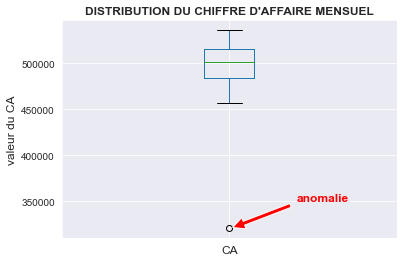

In [69]:
CA_mois.boxplot('CA')
plt.title("DISTRIBUTION DU CHIFFRE D'AFFAIRE MENSUEL", fontweight='bold', fontsize='12')
plt.xlabel('',fontsize=12)
plt.ylabel("valeur du CA",fontsize=12)
plt.xticks( fontsize=12)
plt.annotate('anomalie', xy=(1, 320000), xytext=(1.2, 350000), color='r', fontsize=12, fontweight='bold', arrowprops=dict(facecolor='r', shrink=0.05))
plt.savefig("Boxplot_CA_mensuel.png",dpi=300,bbox_inches = 'tight');
# visualisation de l'anomalie, en-dessous de 350 000.

In [70]:
CA_mois.loc[CA_mois['CA']<350000]
# il s'agit bien du mois d'octobre 2021.

,CA
periode,
2021-10,320951.76


### 3.2.4 -  Recherche de la cause de l'anomalie

#### Etude du chiffre d'affaire mensuel par catégorie

In [71]:
ventes_categ_0=ventes.loc[ventes['categ']==0]
ventes_categ_1=ventes.loc[ventes['categ']==1]
ventes_categ_2=ventes.loc[ventes['categ']==2]

In [72]:
df_0=ventes_categ_0.groupby('periode').sum()
df_1=ventes_categ_1.groupby('periode').sum()
df_2=ventes_categ_2.groupby('periode').sum()
df_tot=ventes.groupby('periode').sum()[['prix']]

In [73]:
df_0_1=pd.merge(df_0, df_1, on = 'periode', how = 'left')
df_0_1_2=pd.merge(df_0_1, df_2, on = 'periode', how = 'left')
df_0_1_2.drop(columns=["categ_x","categ_y","categ"], inplace=True)
df_0_1_2.rename(columns={"prix_x":"CA_0", "prix_y":"CA_1","prix":"CA_2"}, inplace = True)

In [74]:
df_graph=pd.merge(df_0_1_2, df_tot, on = 'periode', how = 'left')
df_graph.rename(columns={"prix":"CA_total"}, inplace = True)

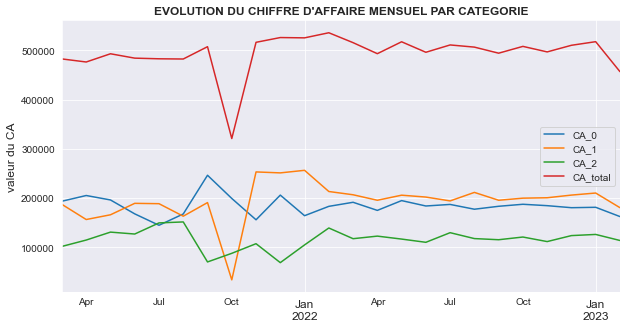

In [75]:
df_graph.plot(kind='line', figsize=(10, 5))
plt.title("EVOLUTION DU CHIFFRE D'AFFAIRE MENSUEL PAR CATEGORIE", fontweight='bold', fontsize='12')
plt.xlabel('',fontsize=12)
plt.ylabel("valeur du CA",fontsize=12)
plt.xticks( fontsize=12)
plt.savefig("Evol_CA_mensuel.png",dpi=300,bbox_inches = 'tight');

**Evaluation de la perte d'information sur le CA si je neutralise octobre 2021**

💡 1ère hypothèse : je garde les données des categories 0 et 2

In [76]:
CA_oct22_cat1=ventes.loc[(ventes['periode']=='2022-10') & (ventes['categ']==1)]['prix'].sum()
CA_oct22_cat1

199828.26000000004

In [77]:
CA_oct21_cat1=ventes.loc[(ventes['periode']=='2021-10') & (ventes['categ']==1)]['prix'].sum()
CA_oct21_cat1

33915.34

In [78]:
perte_A=(CA_oct22_cat1-CA_oct21_cat1)/CA_1ere_annee*100
print("La perte de chiffre d'affaire est estimée à ", round(perte_A,2),'% du CA annuel.')

La perte de chiffre d'affaire est estimée à  2.84 % du CA annuel.


💡 2ème hypothèse : je neutralise le mois d'octobre

In [79]:
CA_oct22=ventes.loc[ventes['periode']=='2022-10']['prix'].sum()
CA_oct22

508136.37

In [80]:
perte_B=CA_oct22/CA_1ere_annee*100
print("La perte de chiffre d'affaire est estimée à ", round(perte_B,2),'% du CA annuel.')

La perte de chiffre d'affaire est estimée à  8.71 % du CA annuel.


In [81]:
ventes_manquantes=ventes.loc[(ventes['date']>'2021-10-03') & (ventes['date']<'2021-10-28') & (ventes['categ']==1)]
ventes_manquantes

,id_prod,prix,categ,date,session_id,client_id,periode
21337,0_2245,21.86,1,2021-10-20,s_107564,c_1746,2021-10
264442,0_2245,21.86,1,2021-10-19,s_107022,c_6128,2021-10
281473,0_2245,21.86,1,2021-10-19,s_106841,c_3953,2021-10
541186,0_2245,21.86,1,2021-10-15,s_105069,c_4188,2021-10
586571,0_2245,21.86,1,2021-10-04,s_100047,c_8138,2021-10
604482,0_2245,21.86,1,2021-10-26,s_110231,c_8286,2021-10
652196,0_2245,21.86,1,2021-10-04,s_99885,c_1514,2021-10


**<u> CONCLUSION**
    
Du 04-10-2021 au 27-10-2021, les ventes de la catégorie 1 sont manquantes. Seul apparaît l'article 0_2245 auquel j'ai attribué la catégorie 1.  
Si je neutralise le mois d'octobre, la perte en terme de chiffre d'affaire représente 8.71 % du CA annuel.   
Si je conserve les données du mois d'octobre sans la catégorie 1, la perte est de 2.84 %, mais l'analyse des répartitions risque d'être faussée.   
Je choisis de neutraliser les ventes du mois d'octobre 2021.

In [82]:
# ventes rectifiées = ventes_rec
ventes_rec=ventes.loc[ventes['periode']!='2021-10'].copy()

### 3.2.5 - Chiffre d'affaire journalier - moyenne glissante

Afin de lisser les fluctuations et mieux visualiser l'évolution des ventes, je réalise une analyse temporelle du chiffre d'affaire en moyenne glissante.

In [83]:
CA_jour_rec=ventes_rec.groupby('date').sum()[['prix']]
CA_jour_rec= CA_jour_rec.rename(columns = {'prix':'CA'})
CA_jour_rec

,CA
date,
2021-03-01,16587.08
2021-03-02,15508.31
2021-03-03,15198.69
2021-03-04,15196.07
2021-03-05,17471.37
...,...
2023-02-24,15207.89
2023-02-25,15761.25
2023-02-26,16304.72


In [84]:
CA_jour_rec.describe(include='all')

,CA
count,699.000000
mean,16505.876938
std,1291.646144
min,13792.210000
25%,15580.465000
50%,16338.900000
75%,17253.060000
max,20509.540000


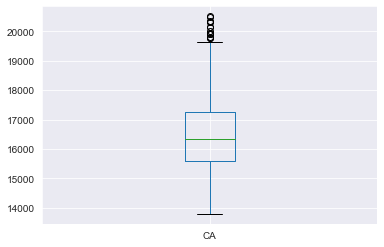

In [85]:
CA_jour_rec.boxplot('CA');

In [86]:
IQ=np.quantile(CA_jour_rec['CA'],.75)-np.quantile(CA_jour_rec['CA'],.25)
x=np.quantile(CA_jour_rec['CA'],.75) + IQ*1.5 
x

19761.952499999992

In [87]:
# Quelques valeurs atypiques, majoritairement en février 2022.
CA_jour_rec.loc[CA_jour_rec['CA']>19762]

,CA
date,
2022-02-10,19894.90
2022-02-11,19935.55
2022-02-14,19997.23
2022-02-15,20324.75
2022-02-16,19770.25
2022-02-20,19819.33
2022-02-24,20360.56
2022-02-26,19908.56
2022-05-15,20473.73


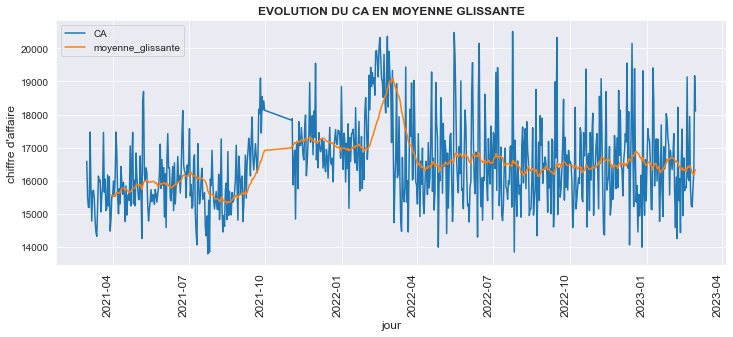

In [88]:
CA_jour_rec['moyenne_glissante']=CA_jour_rec['CA'].rolling(30).mean().dropna()
CA_jour_rec.plot(kind='line', figsize=(12, 5))
plt.title("EVOLUTION DU CA EN MOYENNE GLISSANTE", fontweight='bold', fontsize='12')
plt.xlabel('jour',fontsize=12)
plt.ylabel("chiffre d'affaire",fontsize=12)
plt.xticks(rotation=90, fontsize=12); 

## 3.2.6 - Chiffre d'affaire mensuel- moyenne glissante

In [89]:
CA_mois_rec=ventes_rec.groupby('periode').sum()[['prix']]
CA_mois_rec= CA_mois_rec.rename(columns = {'prix':'CA'})
CA_mois_rec.head()

,CA
periode,
2021-03,482637.35
2021-04,476415.34
2021-05,493118.35
2021-06,484241.58
2021-07,482922.84


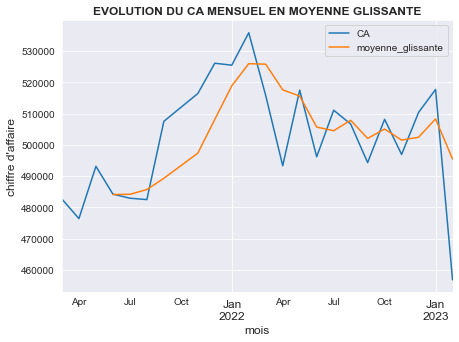

In [90]:
CA_mois_rec['moyenne_glissante']=CA_mois_rec['CA'].rolling(4).mean().dropna()
CA_mois_rec.plot(kind='line', figsize=(7, 5))
plt.title("EVOLUTION DU CA MENSUEL EN MOYENNE GLISSANTE", fontweight='bold', fontsize='12')
plt.xlabel('mois',fontsize=12)
plt.ylabel("chiffre d'affaire",fontsize=12)
plt.xticks( fontsize=12)
plt.savefig("Evol_CA_mensuel_moy_gliss.png",dpi=300,bbox_inches = 'tight'); 

## 3.2.7 - Chiffre d'affaire cumulé

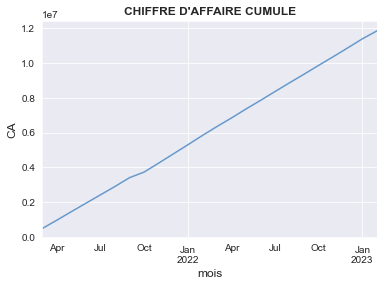

In [91]:
np.cumsum(CA_mois['CA']).plot.line(x=CA_mois.index, y=np.cumsum(CA_mois['CA']), color='#6699CC');
plt.xticks(fontsize=10)
plt.title("CHIFFRE D'AFFAIRE CUMULE", fontweight='bold', fontsize=12)
plt.xlabel('mois',fontsize=12)
plt.ylabel('CA',fontsize=12)
plt.savefig("CA_cumule.png",dpi=300,bbox_inches = 'tight');

Le CA est constant. On observe une ébauche de saisonnalité, avec une légère hausse sur le 1er trimestre 2022, hypothèse à confirmer sur l'année suivante.


### <a name="B9">3.3 - Analyse du volume des ventes</a> <a href="#C">§</a>

### 3.3.1 - Analyse mensuelle

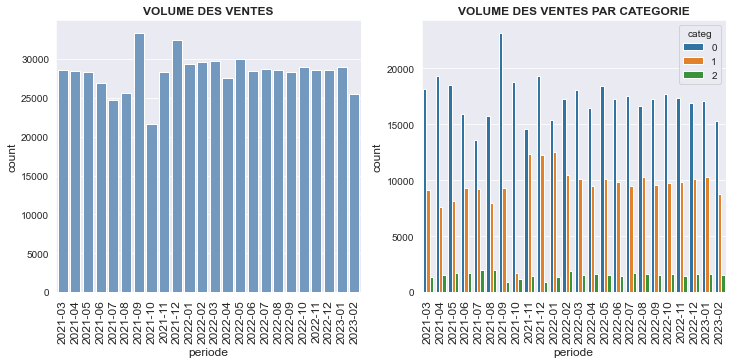

In [92]:
plt.figure(figsize = (12,5)) 

plt.subplot(1,2,1).set_title('VOLUME DES VENTES', fontweight='bold', fontsize=12)
sns.countplot(x='periode', data=ventes.sort_values('periode'),color='#6699CC')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('periode',fontsize=12)
plt.ylabel('count',fontsize=12)

plt.subplot(1,2,2).set_title('VOLUME DES VENTES PAR CATEGORIE', fontweight='bold', fontsize=12)
sns.countplot(x='periode', data=ventes.sort_values('periode'), hue='categ')
plt.xticks(rotation=90, fontsize=12)
plt.xlabel('periode',fontsize=12)
plt.ylabel('count',fontsize=12)
plt.savefig("volume des ventes.png",dpi=300,bbox_inches = 'tight');

In [93]:
ventes_mois=ventes_rec.pivot_table(['id_prod','session_id', 'client_id', 'prix'], ['periode'], aggfunc={'id_prod': len,'session_id':lambda x: len(x.unique()),'client_id':lambda x: len(x.unique()),'prix':sum })
ventes_mois.rename(columns={'client_id':'nombre de client', 'id_prod':'nombre de produit', 'prix': 'CA','session_id': 'nombre de session'},inplace=True)
ventes_mois.head()

,nombre de client,nombre de produit,CA,nombre de session
periode,,,,
2021-03,5676,28610,482637.35,14203
2021-04,5674,28457,476415.34,13972
2021-05,5644,28293,493118.35,14169
2021-06,5659,26857,484241.58,13839
2021-07,5672,24742,482922.84,13573


In [94]:
round(ventes_mois[['nombre de client','nombre de produit','nombre de session']].mean(),2)

nombre de client      5740.87
nombre de produit    28596.78
nombre de session    14383.17
dtype: float64

### 3.3.1 - Analyse journalière

In [95]:
ventes_jour=ventes_rec.pivot_table(['id_prod','session_id', 'client_id', 'prix'], ['date'], aggfunc={'id_prod': len,'session_id':lambda x: len(x.unique()),'client_id':lambda x: len(x.unique()),'prix':sum })
ventes_jour.rename(columns={'client_id':'nombre de client', 'id_prod':'nombre de produit', 'prix': 'CA','session_id': 'nombre de session'},inplace=True)
ventes_jour.head()

,nombre de client,nombre de produit,CA,nombre de session
date,,,,
2021-03-01,438,963,16587.08,487
2021-03-02,428,940,15508.31,471
2021-03-03,395,911,15198.69,437
2021-03-04,406,903,15196.07,449
2021-03-05,440,943,17471.37,496


In [96]:
round(ventes_jour[['nombre de client','nombre de produit','nombre de session']].mean(),2)

nombre de client     429.17
nombre de produit    940.95
nombre de session    475.33
dtype: float64

In [97]:
ventes_jour[['nombre de client','nombre de produit','nombre de session']].mode()

,nombre de client,nombre de produit,nombre de session
0,422,916.0,463.0
1,438,NaN,NaN


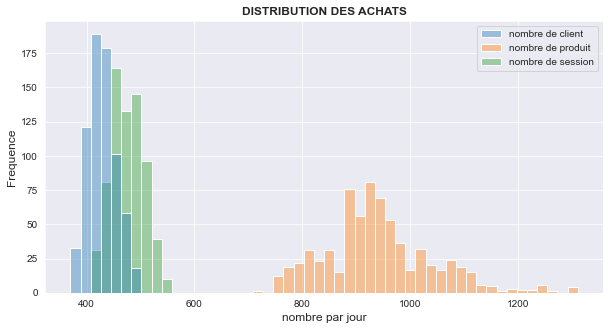

In [98]:
plt.figure(figsize=(10,5))
sns.histplot(ventes_jour[['nombre de client','nombre de produit','nombre de session']],bins=50, alpha=0.4)
plt.title("DISTRIBUTION DES ACHATS", fontweight='bold', fontsize='12')
plt.ylabel('Frequence',fontsize=12)
plt.xlabel("nombre par jour",fontsize=12)
plt.savefig("distribution_des_achats.png",dpi=300,bbox_inches = 'tight');

In [99]:
ventes_jour[['nombre de client','nombre de produit','nombre de session']].kurtosis()

nombre de client    -0.490201
nombre de produit    0.868945
nombre de session   -0.651014
dtype: float64

In [100]:
ventes_jour[['nombre de client','nombre de produit','nombre de session']].skew()

nombre de client     0.227447
nombre de produit    0.701842
nombre de session    0.175867
dtype: float64

**<u> CONCLUSION**
    
Le volume des ventes mensuel est assez stable. En revanche, il est très différent d'une catégorie à l'autre.  
La distribution du nombre de client et du nombre de session est très concentrée contrairement à celle du nombre de produit. 
Le nombre de client et de session varient peu chaque jour.
Etonnement, certains clients ont effectué plusieurs sessions d'achat sur une journée.

# <a name="A4">4 - Analyse des produits vendus</a> <a href="#C">§</a>

## 4.1 - Répartition du chiffre d'affaire par catégorie

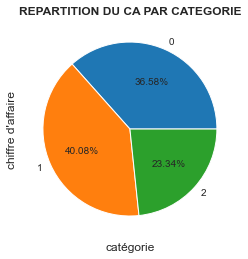

In [101]:
plt.figure(figsize =(9,4))
ventes_rec.groupby('categ').sum()['prix'].plot(kind='pie',autopct='%.2f%%')
plt.title("REPARTITION DU CA PAR CATEGORIE", fontweight='bold', fontsize='12')
plt.xlabel('catégorie',fontsize=12)
plt.ylabel("chiffre d'affaire",fontsize=12)
plt.xticks( fontsize=12)
plt.savefig("repartition_CA_cat.png",dpi=300,bbox_inches = 'tight');

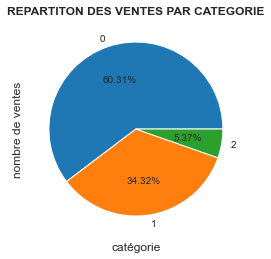

In [102]:
plt.figure(figsize =(9,4))
ventes_rec.groupby('categ').count()['id_prod'].plot(kind='pie',autopct='%.2f%%')
plt.title("REPARTITON DES VENTES PAR CATEGORIE", fontweight='bold', fontsize='12')
plt.xlabel('catégorie',fontsize=12)
plt.ylabel("nombre de ventes",fontsize=12)
plt.xticks( fontsize=12)
plt.savefig("repartition_vol_cat.png",dpi=300,bbox_inches = 'tight');

In [103]:
ventes

,id_prod,prix,categ,date,session_id,client_id,periode
0,0_1518,4.18,0,2022-05-20,s_211425,c_103,2022-05
1,1_251,15.99,1,2022-02-02,s_158752,c_8534,2022-02
2,0_1277,7.99,0,2022-06-18,s_225667,c_6714,2022-06
3,2_209,69.99,2,2021-06-24,s_52962,c_6941,2021-06
4,0_1509,4.99,0,2023-01-11,s_325227,c_4232,2023-01
...,...,...,...,...,...,...,...
679327,0_1551,12.99,0,2022-01-15,s_150195,c_8489,2022-01
679328,1_639,10.99,1,2022-03-19,s_181434,c_4370,2022-03
679329,0_1425,12.99,0,2022-12-20,s_314704,c_304,2022-12
679330,0_1994,4.98,0,2021-07-16,s_63204,c_2227,2021-07


## 4.2 - Classement des ventes

In [104]:
# Nombre de ventes par produits
produits=ventes_rec.pivot_table(['prix'],['id_prod','categ'], aggfunc=len)
produits=produits.rename(columns = {'prix':'nombre de vente'})
produits.reset_index().head()

,id_prod,categ,nombre de vente
0,0_0,0,1194
1,0_1,0,469
2,0_10,0,18
3,0_100,0,3
4,0_1000,0,408


In [105]:
# TOP 5
produits.sort_values('nombre de vente', ascending=False).head(5)   

,,nombre de vente
id_prod,categ,
1_369,1,2237
1_417,1,2173
1_414,1,2166
1_498,1,2117
1_425,1,2084


In [106]:
# FLOP 5
produits.sort_values('nombre de vente',ascending=False).tail(5)   

,,nombre de vente
id_prod,categ,
2_23,2,1
0_1633,0,1
0_1601,0,1
0_1595,0,1
0_1683,0,1


## 4.3 - Les invendus

In [107]:
invendus =pd.merge(products, transactions, on = 'id_prod', how = 'left')
invendus

,id_prod,prix,categ,date,session_id,client_id
0,0_1421,19.99,0,2022-02-20,s_168213,c_6389
1,0_1421,19.99,0,2022-11-19,s_299590,c_8364
2,0_1421,19.99,0,2021-09-19,s_92304,c_3544
3,0_1421,19.99,0,2023-01-11,s_325369,c_1025
4,0_1421,19.99,0,2021-08-01,s_70071,c_2298
...,...,...,...,...,...,...
679127,1_140,38.56,1,2022-06-30,s_231391,c_974
679128,0_1920,25.16,0,2023-01-30,s_334324,c_7748
679129,0_1920,25.16,0,2021-04-13,s_20115,c_7088
679130,0_1920,25.16,0,2021-05-30,s_41465,c_7748


In [108]:
invendus.isna().sum()

id_prod        0
prix           0
categ          0
date          21
session_id    21
client_id     21
dtype: int64

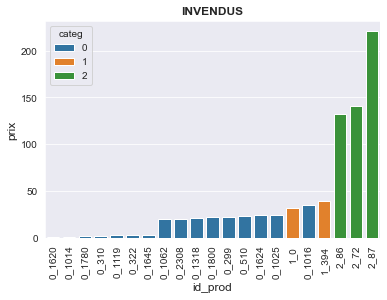

In [109]:
invendus=invendus.loc[invendus['date'].isnull(),:]
sns.barplot(x ='id_prod', y='prix',hue='categ', data=invendus.sort_values('prix'),palette='tab10',dodge=False)
plt.title("INVENDUS", fontweight='bold', fontsize='12')
plt.xlabel('id_prod',fontsize=12)
plt.ylabel("prix",fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.savefig("invendus.png",dpi=300,bbox_inches = 'tight');

In [110]:
# Liste des invendus
invendus.sort_values('prix')

,id_prod,prix,categ,date,session_id,client_id
326860,0_1620,0.80,0,NaT,NaN,NaN
181172,0_1014,1.15,0,NaT,NaN,NaN
62805,0_1780,1.67,0,NaT,NaN,NaN
459089,0_310,1.94,0,NaT,NaN,NaN
177522,0_1119,2.99,0,NaT,NaN,NaN
320861,0_322,2.99,0,NaT,NaN,NaN
290409,0_1645,2.99,0,NaT,NaN,NaN
162765,0_1062,20.08,0,NaT,NaN,NaN
640980,0_2308,20.28,0,NaT,NaN,NaN
230468,0_1318,20.92,0,NaT,NaN,NaN


**<u> CONCLUSION**
    
La catégorie 0 représente 60.31% des ventes, mais seulement 36.58% du CA. Il s'agit des produits les moins chers.  
La catégorie 1 représente 34.32% des ventes et 40.08% du CA.  
La catégorie 2 représente 5.37% des ventes et 22.34% du CA, ce sont les produits les plus chers.  
Les articles constituant le top 5, ont fait l'objet de plus de 2000 ventes.  
Un liste de 21 produits invendus est constituée essentiellement de produits de catégorie 0 (ils représentent 70% des articles référencés).

## <a name="A5">5 - Analyse des sessions d'achat</a> <a href="#C">§</a>

In [111]:
sessions=ventes_rec.groupby('date')[['session_id']].count()
sessions.head()

,session_id
date,
2021-03-01,963
2021-03-02,940
2021-03-03,911
2021-03-04,903
2021-03-05,943


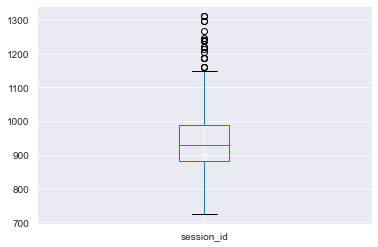

In [112]:
sessions.boxplot();
# 940.95 sessions par jour en moyenne, entre 725 et 1311

In [113]:
sessions.describe()

,session_id
count,699.000000
mean,940.952790
std,100.698972
min,725.000000
25%,883.000000
50%,928.000000
75%,989.500000
max,1311.000000


In [114]:
# Contenu des sessions d'achat
analyse_sessions=ventes_rec.pivot_table(['id_prod','prix'], ['session_id'], aggfunc={'id_prod': len,'prix':sum})
analyse_sessions.rename(columns={"id_prod":"nombre_article", "prix":"panier"}, inplace = True)
analyse_sessions.reset_index().head()

,session_id,nombre_article,panier
0,s_1,1,11.99
1,s_10,1,26.99
2,s_100,2,33.72
3,s_1000,4,39.22
4,s_10000,3,41.49


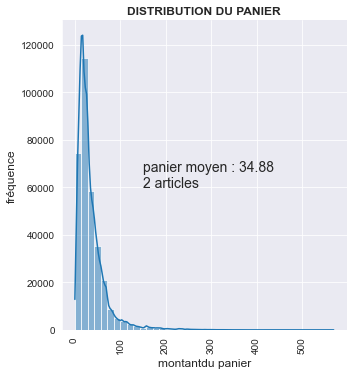

In [115]:
sns.displot(analyse_sessions, x='panier', bins=40, kde=True)
plt.annotate('panier moyen : 34.88\n2 articles', xy=(150, 60000), xytext=(150, 60000), fontsize=14)
plt.title("DISTRIBUTION DU PANIER", fontweight='bold', fontsize='12')
plt.xlabel('montantdu panier',fontsize=12)
plt.ylabel("fréquence",fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.savefig("distri_panier.png",dpi=300,bbox_inches = 'tight');

In [116]:
analyse_sessions.describe()

,nombre_article,panier
count,330769.000000,330769.000000
mean,1.988475,34.881165
std,1.275957,32.703720
min,1.000000,0.620000
25%,1.000000,15.810000
50%,2.000000,25.990000
75%,3.000000,43.410000
max,14.000000,568.880000


In [117]:
# composition des sessions
nombre_article_par_session=analyse_sessions.groupby('nombre_article').count()
nombre_article_par_session= nombre_article_par_session.rename(columns = {'panier':'nombre de sessions'})
nombre_article_par_session.reset_index()

,nombre_article,nombre de sessions
0,1,157417
1,2,87704
2,3,45797
3,4,22941
4,5,9958
5,6,4198
6,7,1793
7,8,597
8,9,252
9,10,78


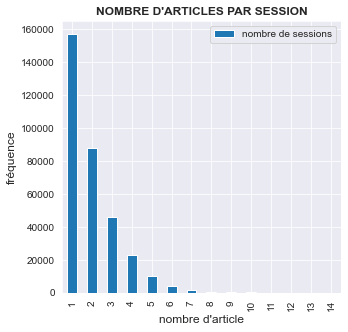

In [118]:
nombre_article_par_session.plot(kind='bar', figsize=(5, 5))
plt.title("NOMBRE D'ARTICLES PAR SESSION", fontweight='bold', fontsize='12')
plt.xlabel("nombre d'article",fontsize=12)
plt.ylabel("fréquence",fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.savefig("art_session.png",dpi=300,bbox_inches = 'tight');

In [119]:
# vérification du calcul
nombre_article_par_session['nombre de sessions'].sum()

330769

In [120]:
# vérification du calcul
len(analyse_sessions.loc[analyse_sessions['nombre_article']==6])

4198

**<u> CONCLUSION**
    
Les sessions sont composées de 1 à 14 articles, 2 en moyenne, de 1 à 3 pour 50% des sessions.  
Le panier est compris entre 0.62 et 568.88 (€), 34.88 en moyenne, entre 15.81 et 43.41  pour 50 % des sessions.

In [121]:
# exemple de session à 14 articles
ventes_rec.loc[ventes['session_id']=='s_118668']

,id_prod,prix,categ,date,session_id,client_id,periode
113874,0_1108,17.45,0,2021-11-12,s_118668,c_5995,2021-11
146359,0_1089,3.99,0,2021-11-12,s_118668,c_5995,2021-11
189954,0_1334,17.74,0,2021-11-12,s_118668,c_5995,2021-11
192650,1_396,18.60,1,2021-11-12,s_118668,c_5995,2021-11
230935,0_1519,5.99,0,2021-11-12,s_118668,c_5995,2021-11
264139,0_1430,16.47,0,2021-11-12,s_118668,c_5995,2021-11
403613,1_498,23.37,1,2021-11-12,s_118668,c_5995,2021-11
444044,0_1612,13.54,0,2021-11-12,s_118668,c_5995,2021-11
463713,0_1488,4.60,0,2021-11-12,s_118668,c_5995,2021-11
511425,2_209,69.99,2,2021-11-12,s_118668,c_5995,2021-11


# <a name="A6">6 - Analyse des clients</a> <a href="#C">§</a>

## <a name="B10">6.1 - Répartition du chiffre d'affaire par client : courbe de Lorenz.</a> <a href="#C">§</a>

In [122]:
ventes_clients=ventes_rec.pivot_table(['id_prod','session_id','date', 'prix'], ['client_id'], aggfunc={'id_prod': len,'session_id':lambda x: len(x.unique()),'date':lambda x: len(x.unique()),'prix':sum })
ventes_clients.rename(columns={'id_prod':'nombre de produit', 'prix': 'CA','session_id': 'nombre de session','date':"nombre de jour d'achat"},inplace=True)
ventes_clients=ventes_clients.reset_index()

In [123]:
# Top 20 des plus gros clients
ventes_clients.sort_values('CA', ascending=False).head(10)

,client_id,nombre de jour d'achat,nombre de produit,CA,nombre de session
677,c_1609,699,24472,312755.08,10538
4387,c_4958,695,5090,282654.61,3764
6336,c_6714,674,8903,149914.91,2511
2723,c_3454,699,6635,111832.29,5444
2108,c_2899,64,105,5214.05,69
634,c_1570,133,356,5136.14,151
2513,c_3263,130,392,5129.89,138
7005,c_7319,134,368,5120.55,142
7790,c_8026,130,368,4991.27,140
4725,c_5263,64,96,4964.87,67


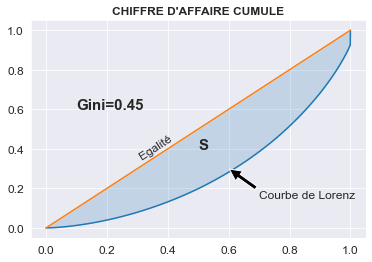

In [124]:
data=ventes_clients['CA']
n=len(data)
lorenz=np.cumsum(np.sort(data))/data.sum()
lorenz=np.append([0],lorenz)
xaxis=np.linspace(0-1/n,1+1/n,len(lorenz))
plt.plot(xaxis,lorenz,drawstyle='steps-post')
plt.plot([0,1], [0,1])

x=xaxis
y1=x
y2=lorenz
plt.fill_between(x,y1,y2, alpha=0.2)

plt.annotate('Gini=0.45',xy=(0.1, 0.6), xytext=(0.1, 0.6),fontsize=15, fontweight='bold')
plt.annotate('S',xy=(0.5, 0.4), xytext=(0.5, 0.4),fontsize=15, fontweight='bold')
plt.annotate('Courbe de Lorenz', xy=(0.6, 0.3), xytext=(0.7, 0.15),fontsize=12, arrowprops=dict(facecolor='black', shrink=0.02))
plt.annotate('Egalité', xy=(0.3, 0.35), xytext=(0.3, 0.35),rotation=33, fontsize=12)


plt.title("CHIFFRE D'AFFAIRE CUMULE", fontweight='bold', fontsize=12, loc='center')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.savefig("lorenz.png",dpi=300,bbox_inches = 'tight');

In [125]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n 
S = 0.5 - AUC 
gini = 2*S
gini

0.44741786352016444

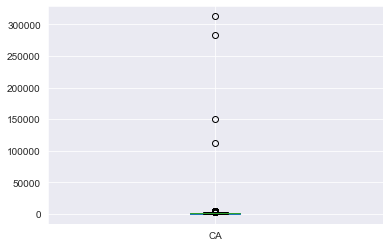

In [126]:
ventes_clients.boxplot('CA');  

**<u> CONCLUSION**

4 gros clients se détachent de l'ensemble la clientèle du site et devront être écarter pour la suite de l'étude client.  
Il y a des petits consommateurs et des gros consommateurs mais le CA est régulièrement répartit sur l'ensemble la clientèle.

## <a name="B11">6.2 - Analyse quantitative des ventes par client.</a> <a href="#C">§</a>

In [127]:
# ventes clients rectifiées = ventes_clients_rec
ventes_clients_rec=ventes_clients.drop([677, 4387,6336,2723])
ventes_clients_rec.sort_values('CA', ascending=False).head(10)

,client_id,nombre de jour d'achat,nombre de produit,CA,nombre de session
2108,c_2899,64,105,5214.05,69
634,c_1570,133,356,5136.14,151
2513,c_3263,130,392,5129.89,138
7005,c_7319,134,368,5120.55,142
7790,c_8026,130,368,4991.27,140
4725,c_5263,64,96,4964.87,67
1268,c_2140,118,381,4949.96,138
7119,c_7421,133,368,4944.39,148
470,c_1422,125,365,4914.74,144
973,c_1876,119,343,4823.80,143


In [128]:
ventes_clients_rec.describe()

,nombre de jour d'achat,nombre de produit,CA,nombre de session
count,8594.000000,8594.000000,8594.000000,8594.000000
mean,34.584710,71.285315,1242.779973,35.898534
std,27.779553,65.614460,931.212407,29.861672
min,1.000000,1.000000,8.300000,1.000000
25%,14.000000,26.000000,534.047500,14.000000
50%,25.000000,50.000000,1000.700000,25.000000
75%,47.000000,93.000000,1729.745000,48.000000
max,147.000000,392.000000,5214.050000,164.000000


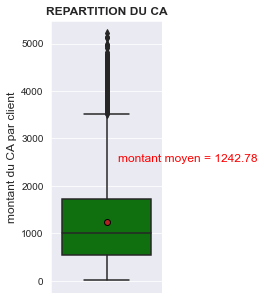

In [129]:
plt.figure(figsize=(2,5))
sns.boxplot(y='CA',data=ventes_clients_rec, color='g',showmeans=True, meanprops=meanprops)
plt.title("REPARTITION DU CA", fontweight='bold', fontsize=12)
plt.annotate('montant moyen = 1242.78', xy=(0.1, 2500), xytext=(0.1, 2500), color='r', fontsize=12)
plt.ylabel('montant du CA par client',fontsize=12)
plt.savefig("boxplot_CA_client.png",dpi=300,bbox_inches ='tight');

In [130]:
# les 23 clients inscrits qui n'ont jamais acheté, pouvant faire l'objet d'une relance.
liste_clients_actifs = ventes['client_id'].tolist()
liste_clients_inactifs=customers[~customers['client_id'].isin(liste_clients_actifs)]
liste_clients_inactifs

,client_id,genre,naissance,age
801,c_8253,f,2001,21
2483,c_3789,f,1997,25
2734,c_4406,f,1998,24
2735,ct_0,f,2001,21
2769,c_2706,f,1967,55
2851,c_3443,m,1959,63
3179,c_4447,m,1956,66
3190,c_3017,f,1992,30
3334,c_4086,f,1992,30
3721,c_6930,m,2004,18


**<u> CONCLUSION**

En neutralisant le mois d'octobre 2021 et en supprimer les 4 gros acheteurs:

Depuis le début de l'exploitation du site, on dénombre 8594 clients actifs qui ont en moyenne, acheté 36 fois sur le site pour un montant de 1242.78 soit 71 articles avec une fréquence de 1 achat toutes les 3 semaines.  
    
Une liste de 21 clients inscrits mais inactifs, de profils variés, a été élaborée. Elle pourra servir à une relance commerciale.

##  <a name="B13">6.3 - Analyse des ventes par âge</a> <a href="#C">§</a>

Il s'agit d'étudier l'influence de l'âge des clients sur le montant des achats, la fréquence des achats et la taille du panier.  Pour  effectuer les corrélations, j'ai besoin de rapprocher les df ventes_clients_rec et customers.

### 6.3.1 - Préparation du df analyse_clients

In [131]:
analyse_clients=pd.merge(ventes_clients_rec, customers, on = 'client_id', how = 'left')  
analyse_clients.head()

,client_id,nombre de jour d'achat,nombre de produit,CA,nombre de session,genre,naissance,age
0,c_1,32,38,550.19,32,m,1955,67
1,c_10,34,58,1353.60,34,m,1956,66
2,c_100,5,8,254.85,5,m,1992,30
3,c_1000,84,122,2209.92,91,f,1966,56
4,c_1001,41,96,1720.08,44,m,1982,40


In [132]:
# j'ajoute une colonne panier
analyse_clients['panier']=round(analyse_clients['CA']/analyse_clients['nombre de session'],2)
analyse_clients.head()

,client_id,nombre de jour d'achat,nombre de produit,CA,nombre de session,genre,naissance,age,panier
0,c_1,32,38,550.19,32,m,1955,67,17.19
1,c_10,34,58,1353.60,34,m,1956,66,39.81
2,c_100,5,8,254.85,5,m,1992,30,50.97
3,c_1000,84,122,2209.92,91,f,1966,56,24.28
4,c_1001,41,96,1720.08,44,m,1982,40,39.09


### 6.3.2 - 1ères analyses

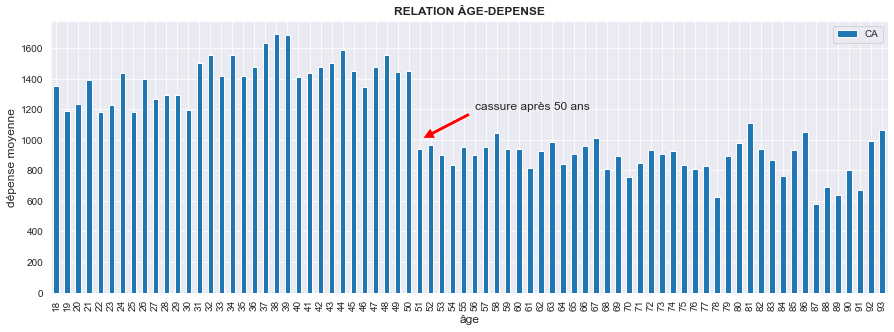

In [133]:
analyse_clients.groupby('age')[['CA']].mean().sort_values('age').plot(kind='bar', figsize=(15, 5))
plt.title("RELATION ÂGE-DEPENSE", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("dépense moyenne",fontsize=12)
plt.annotate('cassure après 50 ans', xy=(33, 1000), xytext=(38, 1200), fontsize=12,arrowprops=dict(facecolor='r', shrink=0.05))
plt.savefig("rel_age_dep.png",dpi=300,bbox_inches ='tight');

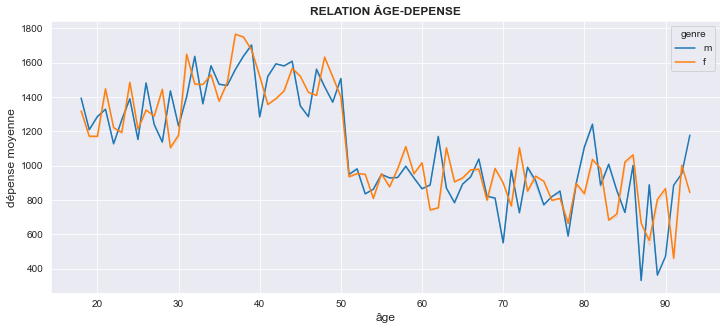

In [134]:
plt.figure(figsize =(12,5))
sns.lineplot(x='age', y='CA', hue='genre', ci=False, data=analyse_clients,)
plt.title("RELATION ÂGE-DEPENSE", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("dépense moyenne",fontsize=12);
# Il n'y a pas de différence sigificative en fonction du genre.

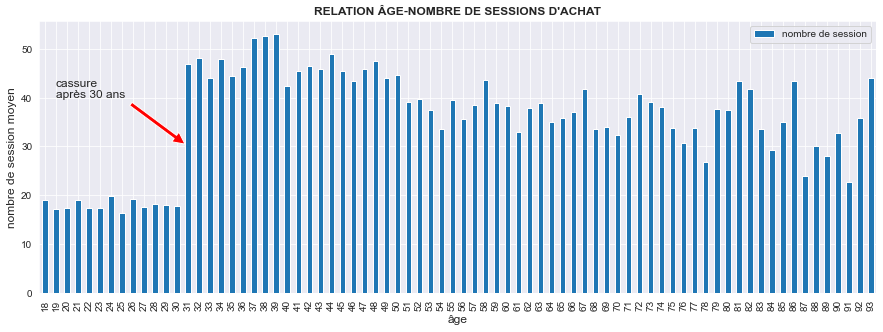

In [135]:
analyse_clients.groupby('age')[['nombre de session']].mean().sort_values('age').plot(kind='bar', figsize=(15, 5))
plt.title("RELATION ÂGE-NOMBRE DE SESSIONS D'ACHAT", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("nombre de session moyen",fontsize=12)
plt.annotate('cassure\naprès 30 ans', xy=(13, 30), xytext=(1, 40), fontsize=12,arrowprops=dict(facecolor='r', shrink=0.05));

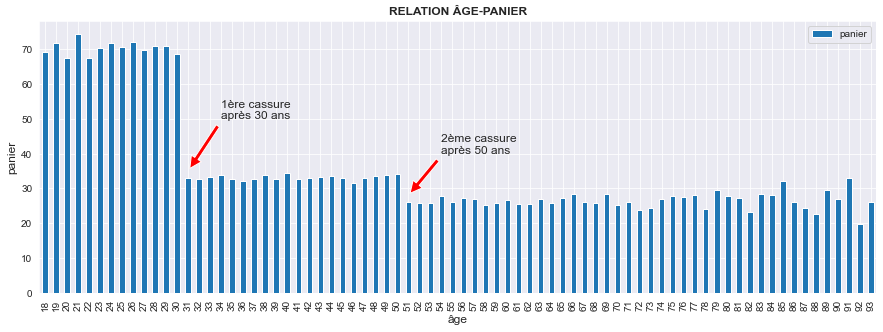

In [136]:
analyse_clients.groupby('age')[['panier']].mean().sort_values('age').plot(kind='bar', title = 'Relation âge-panier', figsize=(15, 5))
plt.title("RELATION ÂGE-PANIER", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("panier",fontsize=12)
plt.annotate('1ère cassure\naprès 30 ans', xy=(13, 35), xytext=(16, 50), fontsize=12,arrowprops=dict(facecolor='r', shrink=0.05))
plt.annotate('2ème cassure\naprès 50 ans', xy=(33, 28), xytext=(36, 40), fontsize=12,arrowprops=dict(facecolor='r', shrink=0.05))
plt.savefig("rel_age_panier.png",dpi=300,bbox_inches ='tight');

Les premières explorations permettent d'établir qu'il y a une relation entre l'âge des clients et leur comportement d'achat.   Pour plus de clarté, il est intéressant d'ajouter une colonne tranche d'âge, dont les limites s'appuient sur les cassures observées.

In [137]:
analyse_clients['tranche_age']=pd.cut(analyse_clients['age'],[18,30,50,70,93])
analyse_clients

,client_id,nombre de jour d'achat,nombre de produit,CA,nombre de session,genre,naissance,age,panier,tranche_age
0,c_1,32,38,550.19,32,m,1955,67,17.19,"(50, 70]"
1,c_10,34,58,1353.60,34,m,1956,66,39.81,"(50, 70]"
2,c_100,5,8,254.85,5,m,1992,30,50.97,"(18, 30]"
3,c_1000,84,122,2209.92,91,f,1966,56,24.28,"(50, 70]"
4,c_1001,41,96,1720.08,44,m,1982,40,39.09,"(30, 50]"
...,...,...,...,...,...,...,...,...,...,...
8589,c_995,9,14,189.41,9,m,1955,67,21.05,"(50, 70]"
8590,c_996,75,94,1611.59,78,f,1970,52,20.66,"(50, 70]"
8591,c_997,23,58,1432.02,23,f,1994,28,62.26,"(18, 30]"
8592,c_998,23,53,2779.88,23,m,2001,21,120.86,"(18, 30]"


### 6.3.3 - Analyse par tranche d'âge

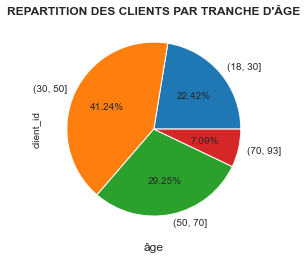

In [138]:
analyse_clients.groupby('tranche_age').count()['client_id'].plot(kind='pie', autopct='%.2f%%')
plt.title("REPARTITION DES CLIENTS PAR TRANCHE D'ÂGE", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.savefig("rep_client_tr_age.png",dpi=300,bbox_inches ='tight');

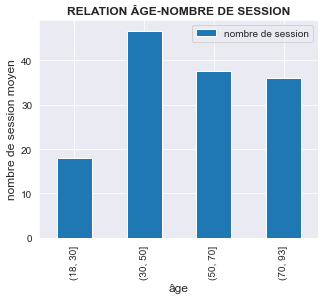

In [139]:
analyse_clients.groupby('tranche_age')[['nombre de session']].mean().sort_values('tranche_age').plot(kind='bar', figsize=(5,4));
plt.title("RELATION ÂGE-NOMBRE DE SESSION", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("nombre de session moyen",fontsize=12)
plt.savefig("rel_age_session.png",dpi=300,bbox_inches ='tight');

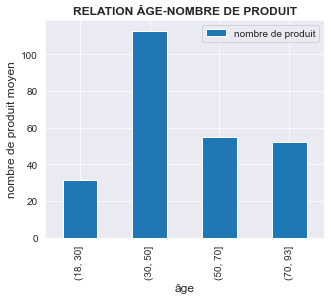

In [140]:
analyse_clients.groupby('tranche_age')[['nombre de produit']].mean().sort_values('tranche_age').plot(kind='bar', figsize=(5,4));
plt.title("RELATION ÂGE-NOMBRE DE PRODUIT", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("nombre de produit moyen",fontsize=12)
plt.savefig("rel_age_qte.png",dpi=300,bbox_inches ='tight');

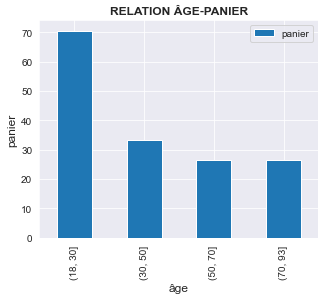

In [141]:
analyse_clients.groupby('tranche_age')[['panier']].mean().sort_values('tranche_age').plot(kind='bar', figsize=(5,4))
plt.title("RELATION ÂGE-PANIER", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("panier",fontsize=12)
plt.savefig("rel_age_panier.png",dpi=300,bbox_inches ='tight');

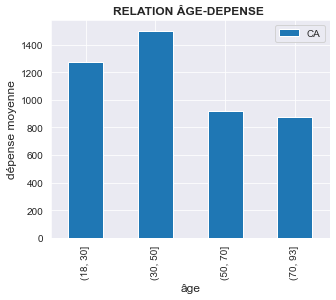

In [142]:
analyse_clients.groupby('tranche_age')[['CA']].mean().sort_values('tranche_age').plot(kind='bar', figsize=(5,4),)
plt.title("RELATION ÂGE-DEPENSE ", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("dépense moyenne",fontsize=12)
plt.savefig("rel_age_dépense.png",dpi=300,bbox_inches ='tight');

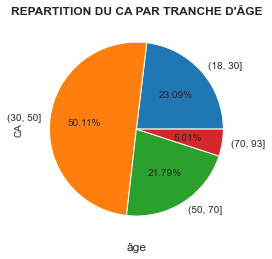

In [143]:
analyse_clients.groupby('tranche_age').sum()['CA'].plot(kind='pie', autopct='%.2f%%')
plt.title("REPARTITION DU CA PAR TRANCHE D'ÂGE", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.savefig("rel_age_CA.png",dpi=300,bbox_inches ='tight');

**<u>CONCLUSION**

Les 30–50 ans 
représentent 41,24% de la clientèle et 50,11% du CA.

Les 18–30 ans
effectuent moins de sessions d’achat, mais ont le panier moyen le plus élevé, d’où une dépense moyenne importante.

Les 50–70 et 70–93 ont des comportements d’achat similaires.

### <a name="B14">6.4 - Analyse par genre</a> <a href="#C">§</a>

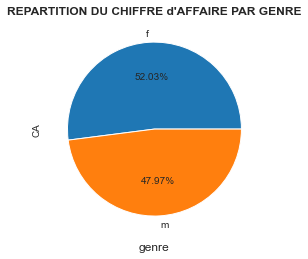

In [144]:
analyse_clients.groupby('genre').sum()['CA'].plot(kind='pie', autopct='%.2f%%')
plt.title("REPARTITION DU CHIFFRE d'AFFAIRE PAR GENRE", fontweight='bold', fontsize='12')
plt.xlabel("genre",fontsize=12)
plt.savefig("rep_CA_genre.png",dpi=300,bbox_inches ='tight');

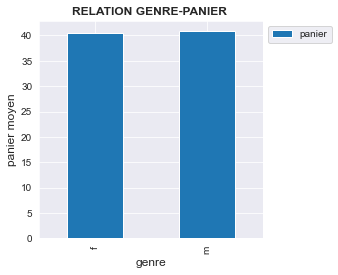

In [145]:
analyse_clients.groupby('genre')[['panier']].mean().plot(kind='bar', figsize=(4, 4))
plt.legend(bbox_to_anchor=(1,1))
plt.title("RELATION GENRE-PANIER ", fontweight='bold', fontsize='12')
plt.xlabel("genre",fontsize=12)
plt.ylabel("panier moyen",fontsize=12);

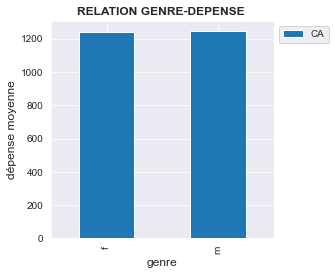

In [146]:
analyse_clients.groupby('genre')[['CA']].mean().plot(kind='bar', figsize=(4, 4))
plt.legend(bbox_to_anchor=(1,1))
plt.title("RELATION GENRE-DEPENSE ", fontweight='bold', fontsize='12')
plt.xlabel("genre",fontsize=12)
plt.ylabel("dépense moyenne",fontsize=12);

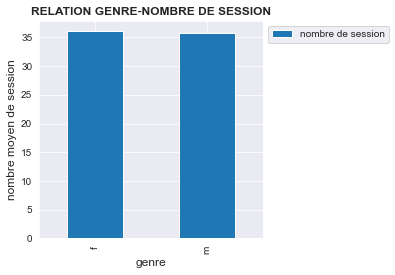

In [147]:
analyse_clients.groupby('genre')[['nombre de session']].mean().plot(kind='bar', title = 'Relation genre-nombre de session', figsize=(4, 4))
plt.legend(bbox_to_anchor=(1,1))
plt.title("RELATION GENRE-NOMBRE DE SESSION", fontweight='bold', fontsize='12')
plt.xlabel("genre",fontsize=12)
plt.ylabel("nombre moyen de session",fontsize=12);

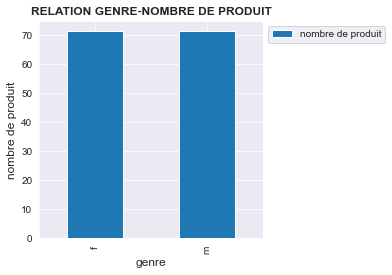

In [148]:
analyse_clients.groupby('genre')[['nombre de produit']].mean().plot(kind='bar', title = 'Relation genre-nombre de session', figsize=(4, 4))
plt.legend(bbox_to_anchor=(1,1))
plt.title("RELATION GENRE-NOMBRE DE PRODUIT", fontweight='bold', fontsize='12')
plt.xlabel("genre",fontsize=12)
plt.ylabel("nombre de produit",fontsize=12);

### Analyse par genre en fonction des tranches d'âge

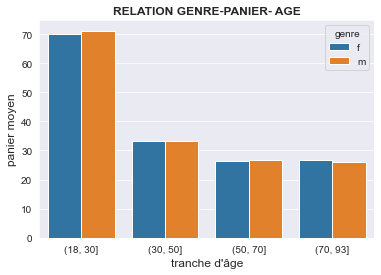

In [149]:
CA_A_P=analyse_clients.groupby(['tranche_age', 'genre'])[['panier']].mean().reset_index()
sns.barplot(x='tranche_age', y='panier', hue='genre', data=CA_A_P)
plt.title("RELATION GENRE-PANIER- AGE", fontweight='bold', fontsize='12')
plt.xlabel("tranche d'âge",fontsize=12)
plt.ylabel("panier moyen",fontsize=12)
plt.savefig("rel_genre_P.png",dpi=300,bbox_inches ='tight');

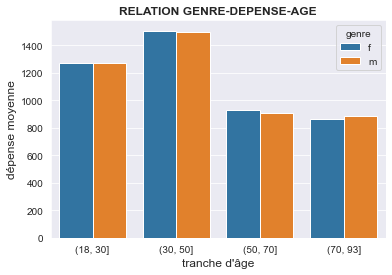

In [150]:
CA_A_G=analyse_clients.groupby(['tranche_age', 'genre'])[['CA']].mean().reset_index()
sns.barplot(x='tranche_age', y='CA', hue='genre', data=CA_A_G)
plt.title("RELATION GENRE-DEPENSE-AGE", fontweight='bold', fontsize='12')
plt.xlabel("tranche d'âge",fontsize=12)
plt.ylabel("dépense moyenne",fontsize=12)
plt.savefig("rel_genre_D.png",dpi=300,bbox_inches ='tight');

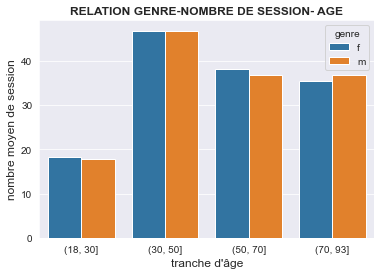

In [151]:
CA_A_S=analyse_clients.groupby(['tranche_age', 'genre'])[['nombre de session']].mean().reset_index()
sns.barplot(x='tranche_age', y='nombre de session', hue='genre', data=CA_A_S)
plt.title("RELATION GENRE-NOMBRE DE SESSION- AGE", fontweight='bold', fontsize='12')
plt.xlabel("tranche d'âge",fontsize=12)
plt.ylabel("nombre moyen de session",fontsize=12)
plt.savefig("rel_genre_S.png",dpi=300,bbox_inches ='tight');

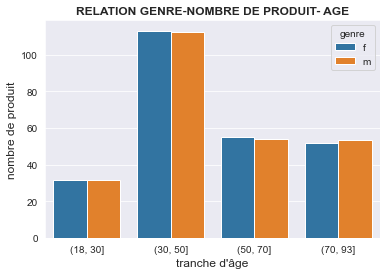

In [152]:
CA_A_Pd=analyse_clients.groupby(['tranche_age', 'genre'])[['nombre de produit']].mean().reset_index()
sns.barplot(x='tranche_age', y='nombre de produit', hue='genre', data=CA_A_Pd)
plt.title("RELATION GENRE-NOMBRE DE PRODUIT- AGE", fontweight='bold', fontsize='12')
plt.xlabel("tranche d'âge",fontsize=12)
plt.ylabel("nombre de produit",fontsize=12)
plt.savefig("rel_genre_Pd.png",dpi=300,bbox_inches ='tight');

**<u>CONCLUSION**
    
Il n'y a pas d'influence du genre sur les volumes d'achat, quelque soit la tranche d'âge.

# <a name="A7">7 - Analyse clients-produits</a> <a href="#C">§</a>

Pour étudier l'influence du profil client sur la catégorie de livre acheté, je rajoute au df ventes les données du df costumers.

## <a name="B19">7.1 - Préparation du DF analyse_ventes</a> <a href="#C">§</a>

In [153]:
analyse_ventes =pd.merge(ventes_rec, customers, on = 'client_id', how = 'left')  
analyse_ventes

,id_prod,prix,categ,date,session_id,client_id,periode,genre,naissance,age
0,0_1518,4.18,0,2022-05-20,s_211425,c_103,2022-05,f,1986,36
1,1_251,15.99,1,2022-02-02,s_158752,c_8534,2022-02,m,1988,34
2,0_1277,7.99,0,2022-06-18,s_225667,c_6714,2022-06,f,1968,54
3,2_209,69.99,2,2021-06-24,s_52962,c_6941,2021-06,m,2000,22
4,0_1509,4.99,0,2023-01-11,s_325227,c_4232,2023-01,m,1980,42
...,...,...,...,...,...,...,...,...,...,...
657721,0_1551,12.99,0,2022-01-15,s_150195,c_8489,2022-01,f,1951,71
657722,1_639,10.99,1,2022-03-19,s_181434,c_4370,2022-03,f,1977,45
657723,0_1425,12.99,0,2022-12-20,s_314704,c_304,2022-12,f,1988,34
657724,0_1994,4.98,0,2021-07-16,s_63204,c_2227,2021-07,m,1986,36


In [154]:
analyse_ventes.isna().sum()

id_prod       0
prix          0
categ         0
date          0
session_id    0
client_id     0
periode       0
genre         0
naissance     0
age           0
dtype: int64

In [155]:
analyse_ventes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 657726 entries, 0 to 657725
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     657726 non-null  object        
 1   prix        657726 non-null  float64       
 2   categ       657726 non-null  int64         
 3   date        657726 non-null  datetime64[ns]
 4   session_id  657726 non-null  object        
 5   client_id   657726 non-null  object        
 6   periode     657726 non-null  period[M]     
 7   genre       657726 non-null  object        
 8   naissance   657726 non-null  int64         
 9   age         657726 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(4), period[M](1)
memory usage: 55.2+ MB


In [156]:
analyse_ventes.head()

,id_prod,prix,categ,date,session_id,client_id,periode,genre,naissance,age
0,0_1518,4.18,0,2022-05-20,s_211425,c_103,2022-05,f,1986,36
1,1_251,15.99,1,2022-02-02,s_158752,c_8534,2022-02,m,1988,34
2,0_1277,7.99,0,2022-06-18,s_225667,c_6714,2022-06,f,1968,54
3,2_209,69.99,2,2021-06-24,s_52962,c_6941,2021-06,m,2000,22
4,0_1509,4.99,0,2023-01-11,s_325227,c_4232,2023-01,m,1980,42


## <a name="B16">7.2 - Analyse âge - catégorie</a> <a href="#C">§</a>

### Répartition de l'âge des clients pour chaque catégorie de livre.

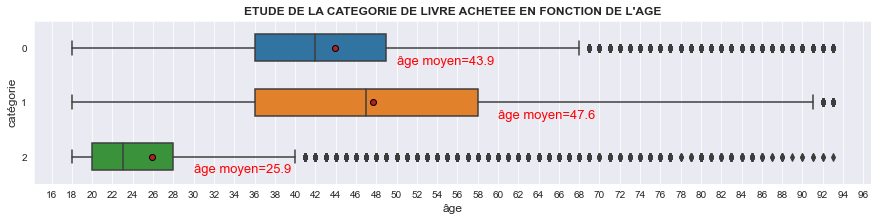

In [157]:
plt.figure(figsize=(15,3))
sns.color_palette('tab10')
plt.locator_params(axis="x", nbins=50)
meanprops = {'marker':'o', 'markeredgecolor':'black','markerfacecolor':'firebrick'}
sns.boxplot(x='age',y='categ', orient='h',data=analyse_ventes, width=0.5,palette=sns.color_palette('tab10'),showmeans=True,meanprops=meanprops)
plt.title("ETUDE DE LA CATEGORIE DE LIVRE ACHETEE EN FONCTION DE L'AGE", fontweight='bold', fontsize=12)
plt.xlabel('âge',fontsize=12)
plt.ylabel('catégorie',fontsize=12)
plt.annotate('âge moyen=25.9', xy=(30, 2.3), xytext=(30, 2.3), color='r', fontsize=13)
plt.annotate('âge moyen=43.9', xy=(50, 0.3), xytext=(50, 0.3), color='r', fontsize=13)
plt.annotate('âge moyen=47.6', xy=(60, 1.3), xytext=(60, 1.3), color='r', fontsize=13)
plt.savefig("boxplot_age_cat.png",dpi=300,bbox_inches ='tight');

In [158]:
analyse_ventes.groupby(['categ'])['age'].describe()

,count,mean,std,min,25%,50%,75%,max
categ,,,,,,,,
0,396697.0,43.902760,11.212427,18.0,36.0,42.0,49.0,93.0
1,225717.0,47.647111,15.491196,18.0,36.0,47.0,58.0,93.0
2,35312.0,25.941408,9.792032,18.0,20.0,23.0,28.0,93.0


In [159]:
analyse_ventes['tranche_age']=pd.cut(analyse_ventes['age'],[18,30,50,70,93])
analyse_ventes

,id_prod,prix,categ,date,session_id,client_id,periode,genre,naissance,age,tranche_age
0,0_1518,4.18,0,2022-05-20,s_211425,c_103,2022-05,f,1986,36,"(30, 50]"
1,1_251,15.99,1,2022-02-02,s_158752,c_8534,2022-02,m,1988,34,"(30, 50]"
2,0_1277,7.99,0,2022-06-18,s_225667,c_6714,2022-06,f,1968,54,"(50, 70]"
3,2_209,69.99,2,2021-06-24,s_52962,c_6941,2021-06,m,2000,22,"(18, 30]"
4,0_1509,4.99,0,2023-01-11,s_325227,c_4232,2023-01,m,1980,42,"(30, 50]"
...,...,...,...,...,...,...,...,...,...,...,...
657721,0_1551,12.99,0,2022-01-15,s_150195,c_8489,2022-01,f,1951,71,"(70, 93]"
657722,1_639,10.99,1,2022-03-19,s_181434,c_4370,2022-03,f,1977,45,"(30, 50]"
657723,0_1425,12.99,0,2022-12-20,s_314704,c_304,2022-12,f,1988,34,"(30, 50]"
657724,0_1994,4.98,0,2021-07-16,s_63204,c_2227,2021-07,m,1986,36,"(30, 50]"


### Nombre de produit vendus par catégorie en fonction de l'âge.

In [160]:
cat_par_age_nb_pd=analyse_ventes.pivot_table('id_prod', index='tranche_age',columns='categ', aggfunc='count')
cat_par_age_nb_pd

categ,0,1,2
tranche_age,,,
"(18, 30]",12633,24090,26309
"(30, 50]",304930,97584,1441
"(50, 70]",62977,81325,1469
"(70, 93]",12874,17047,278


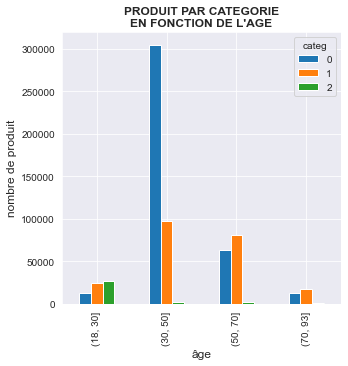

In [161]:
cat_par_age_nb_pd.plot(kind='bar',figsize=(5,5))
plt.title("PRODUIT PAR CATEGORIE\nEN FONCTION DE L'AGE", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("nombre de produit",fontsize=12)
plt.savefig("rep_pd_age_cat.png",dpi=300,bbox_inches ='tight');

In [162]:
cat_par_age=analyse_ventes.pivot_table('prix', index='tranche_age',columns='categ', aggfunc='sum')
cat_par_age

categ,0,1,2
tranche_age,,,
"(18, 30]",134927.19,493446.95,1983400.86
"(30, 50]",3241161.76,1996667.28,130734.61
"(50, 70]",672382.17,1668357.91,119173.39
"(70, 93]",137536.10,348762.33,19643.20


### Chiffre d'affaire généré par catégorie en fonction de l'âge.

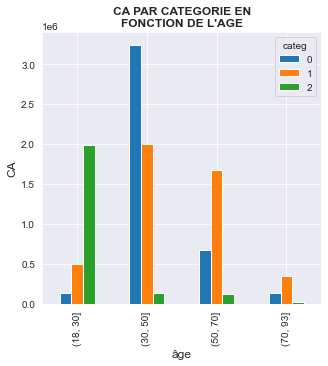

In [163]:
cat_par_age.plot(kind='bar',figsize=(5,5))
plt.title("CA PAR CATEGORIE EN\nFONCTION DE L'AGE", fontweight='bold', fontsize='12')
plt.xlabel("âge",fontsize=12)
plt.ylabel("CA",fontsize=12)
plt.savefig("rep_CA_age_cat.png",dpi=300,bbox_inches ='tight');

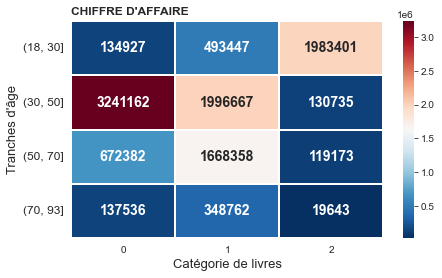

In [164]:
plt.figure(figsize = (7,4))
sns.heatmap(cat_par_age, cmap='RdBu_r', linewidth=2, annot=True, fmt='.0f', annot_kws={'fontsize':14, 'fontweight':'bold'})
plt.xlabel('Catégorie de livres',fontsize=13,loc='center')  
plt.ylabel("Tranches d'âge",fontsize=13)  
plt.yticks(rotation=0,fontsize=12)
plt.title("CHIFFRE D'AFFAIRE", fontweight='bold', fontsize=12, loc='left');

# Les plus gros CA sont générés par les categ.0 et 1 , achetés par les clients 30-50 ans.

**<u> CONCLUSION**

Il y un lien entre l'âge  et la catégoie de livre achetée :  
Les 18-30 ans achètent les 3 catégories mais sont les principaux acheteurs de catégorie 2.  
Les 30-50 ans achètent 3 fois plus de catégorie 0 que de catégorie 1.   
Les 50-70 et 70-93 ans achètent plus de catégorie 1 que de catégorie 0.

## <a name="B15">7.3 - Analyse genre - catégorie</a> <a href="#C">§</a>

In [165]:
cat_par_genre=analyse_ventes.pivot_table('prix', index='genre',columns='categ', aggfunc='sum')
cat_par_genre

categ,0,1,2
genre,,,
f,2093117.08,2344429.81,1269296.09
m,2127363.06,2280208.60,1423193.34


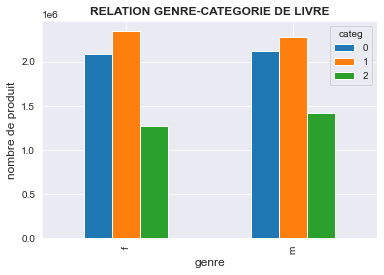

In [166]:
cat_par_genre.plot(kind='bar')
plt.title("RELATION GENRE-CATEGORIE DE LIVRE", fontweight='bold', fontsize='12')
plt.xlabel("genre",fontsize=12)
plt.ylabel("nombre de produit",fontsize=12)
plt.savefig("rel_genre_cat.png",dpi=300,bbox_inches ='tight');

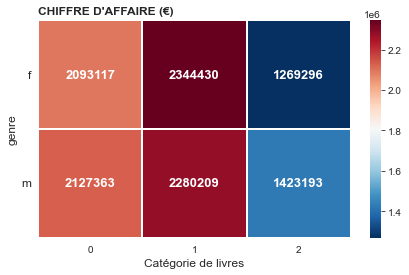

In [167]:
plt.figure(figsize = (7,4))
sns.heatmap(cat_par_genre, cmap='RdBu_r', linewidth=2, annot=True, fmt='.0f', annot_kws={'fontsize':13, 'fontweight':'bold'})
plt.xlabel('Catégorie de livres',fontsize=12,loc='center')               
plt.ylabel("genre",fontsize=12)                                          
plt.yticks(rotation=0,fontsize=12)
plt.title("CHIFFRE D'AFFAIRE (€)", fontweight='bold', fontsize=12, loc='left')
plt.savefig("HMAP_genre_cat.png",dpi=300,bbox_inches ='tight');

**<u> CONCLUSION**
    
Il n'y a pas d'influence importante du genre sur la catégorie de livre acheté.  
Le heatmap fait ressortir que les hommes seraient plus nombreux que les femmes à acheter des catégories 0 et 2, et les femmes plûtôt des catégorie 1, (rappelons que les femmes sont légèrement majoritaire au sein de la clientèle).

# <a name="A8">8 - Fréquence d'achat</a> <a href="#C">§</a>

In [168]:
# frequence_achat = délai moyen entre 2 achats
analyse_clients['frequence_achat']=round(730/analyse_clients["nombre de jour d'achat"],2)
analyse_clients

,client_id,nombre de jour d'achat,nombre de produit,CA,nombre de session,genre,naissance,age,panier,tranche_age,frequence_achat
0,c_1,32,38,550.19,32,m,1955,67,17.19,"(50, 70]",22.81
1,c_10,34,58,1353.60,34,m,1956,66,39.81,"(50, 70]",21.47
2,c_100,5,8,254.85,5,m,1992,30,50.97,"(18, 30]",146.00
3,c_1000,84,122,2209.92,91,f,1966,56,24.28,"(50, 70]",8.69
4,c_1001,41,96,1720.08,44,m,1982,40,39.09,"(30, 50]",17.80
...,...,...,...,...,...,...,...,...,...,...,...
8589,c_995,9,14,189.41,9,m,1955,67,21.05,"(50, 70]",81.11
8590,c_996,75,94,1611.59,78,f,1970,52,20.66,"(50, 70]",9.73
8591,c_997,23,58,1432.02,23,f,1994,28,62.26,"(18, 30]",31.74
8592,c_998,23,53,2779.88,23,m,2001,21,120.86,"(18, 30]",31.74


## <a name="B17">8.1 - Fréquence d'achat en fonction de l'âge</a> <a href="#C">§</a>

In [169]:
analyse_clients.groupby('tranche_age')[['frequence_achat']].mean().sort_values('tranche_age')

,frequence_achat
tranche_age,
"(18, 30]",72.721165
"(30, 50]",30.774822
"(50, 70]",43.200369
"(70, 93]",44.464740


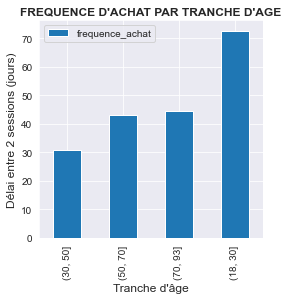

In [170]:
analyse_clients.groupby('tranche_age')[['frequence_achat']].mean().sort_values('frequence_achat').plot(kind='bar', title = "Relation âge-fréquence d'achat", figsize=(4, 4))
plt.title("FREQUENCE D'ACHAT PAR TRANCHE D'AGE", fontweight='bold', fontsize=12)
plt.ylabel('Délai entre 2 sessions (jours)',fontsize=12)
plt.xlabel("Tranche d'âge",fontsize=12)
plt.savefig("frep_age.png",dpi=300,bbox_inches ='tight');

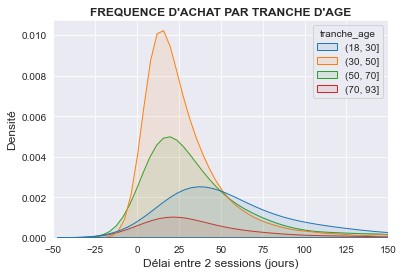

In [171]:
frequence_achat_age=analyse_clients[['frequence_achat','tranche_age']]
plt.xlim(-50,150)
sns.kdeplot('frequence_achat', hue='tranche_age', color='#330066', shade=True, data=frequence_achat_age, alpha=0.1)
plt.title("FREQUENCE D'ACHAT PAR TRANCHE D'AGE", fontweight='bold', fontsize=12)
plt.xlabel('Délai entre 2 sessions (jours)',fontsize=12)
plt.ylabel('Densité',fontsize=12)
plt.savefig("frep_age_dens.png",dpi=300,bbox_inches ='tight');

**<u>CONCLUSION**

Les 30-50 ans achètent plus souvent (tous les 30 jours), les 18-30 ans achètent moins souvent (tous les 72 jours).   
Les comportements sont moins homogènes pour les tranches d'âge 18-30 ans et 70-93 ans.

## <a name="B18">8.2 - Fréquence d'achat en fonction du genre</a> <a href="#C">§</a>

In [172]:
analyse_clients.groupby('genre')[['frequence_achat']].mean()

,frequence_achat
genre,
f,46.017236
m,45.957620


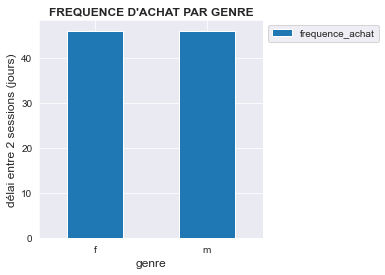

In [173]:
analyse_clients.groupby('genre')[['frequence_achat']].mean().plot(kind='bar', figsize=(4, 4))
plt.legend(bbox_to_anchor=(1,1))
plt.title("FREQUENCE D'ACHAT PAR GENRE", fontweight='bold', fontsize=12)
plt.ylabel('délai entre 2 sessions (jours)',fontsize=12)
plt.xticks(rotation='0')
plt.xlabel('genre',fontsize=12)
plt.savefig("frep_genre.png",dpi=300,bbox_inches ='tight');

**<u>CONCLUSION**

Il n'y a pas de différence de comportement en fonction du genre.

# <a name="A9">9 - Correlations</a> <a href="#C">§</a>

Afin d'examiner rapidement toutes les corrélations entre les variables, je réalise un pairplot sur les df principaux.

## <a name="B20">9.1 - Pairplot sur analyse_ventes</a><a href="#C">§</a>

In [174]:
analyse_ventes.head()

,id_prod,prix,categ,date,session_id,client_id,periode,genre,naissance,age,tranche_age
0,0_1518,4.18,0,2022-05-20,s_211425,c_103,2022-05,f,1986,36,"(30, 50]"
1,1_251,15.99,1,2022-02-02,s_158752,c_8534,2022-02,m,1988,34,"(30, 50]"
2,0_1277,7.99,0,2022-06-18,s_225667,c_6714,2022-06,f,1968,54,"(50, 70]"
3,2_209,69.99,2,2021-06-24,s_52962,c_6941,2021-06,m,2000,22,"(18, 30]"
4,0_1509,4.99,0,2023-01-11,s_325227,c_4232,2023-01,m,1980,42,"(30, 50]"


analyse ventes en fonction du genre

sns.pairplot(analyse_ventes, hue ='genre') 
plt.show();
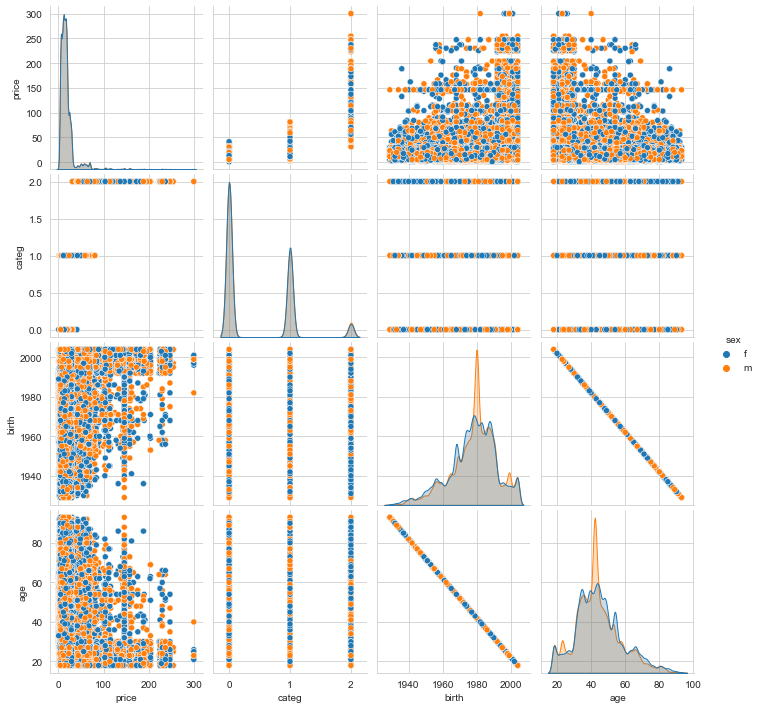

In [175]:
analyse_ventes.corr(method ='pearson')

,prix,categ,naissance,age
prix,1.000000,0.669579,0.208658,-0.208658
categ,0.669579,1.000000,0.097166,-0.097166
naissance,0.208658,0.097166,1.000000,-1.000000
age,-0.208658,-0.097166,-1.000000,1.000000


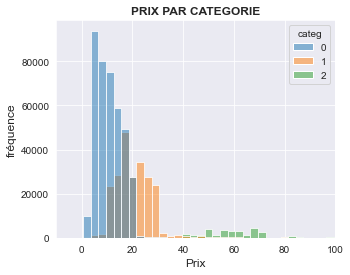

In [176]:
plt.figure(figsize=(5,4))
plt.xlim(-10,100)
sns.histplot(x=analyse_ventes['prix'], hue=analyse_ventes['categ'],bins=100,palette='tab10')
plt.title("PRIX PAR CATEGORIE", fontweight='bold', fontsize=12)
plt.xlabel('Prix',fontsize=12)
plt.ylabel('fréquence',fontsize=12)
plt.savefig("corr_prix_cat.png",dpi=300,bbox_inches ='tight');

<a name="D2">**<u> CONCLUSION**</a>
    
La seule corrélation qui apparaît concerne les variables 'prix' et 'categ', une quantiative et une qualitative.  
Le prix augmente avec la catégorie, on retrouve ici η2=0.7 calculé par **ANOVA** paragraphe <a href="#D1">2.2</a>

## <a name="B21">9.2 - Pairplot sur analyse_clients</a><a href="#C">§</a>


In [177]:
analyse_clients.head()

,client_id,nombre de jour d'achat,nombre de produit,CA,nombre de session,genre,naissance,age,panier,tranche_age,frequence_achat
0,c_1,32,38,550.19,32,m,1955,67,17.19,"(50, 70]",22.81
1,c_10,34,58,1353.60,34,m,1956,66,39.81,"(50, 70]",21.47
2,c_100,5,8,254.85,5,m,1992,30,50.97,"(18, 30]",146.00
3,c_1000,84,122,2209.92,91,f,1966,56,24.28,"(50, 70]",8.69
4,c_1001,41,96,1720.08,44,m,1982,40,39.09,"(30, 50]",17.80


sns.pairplot(analyse_clients, hue ='genre') 
plt.show(); 
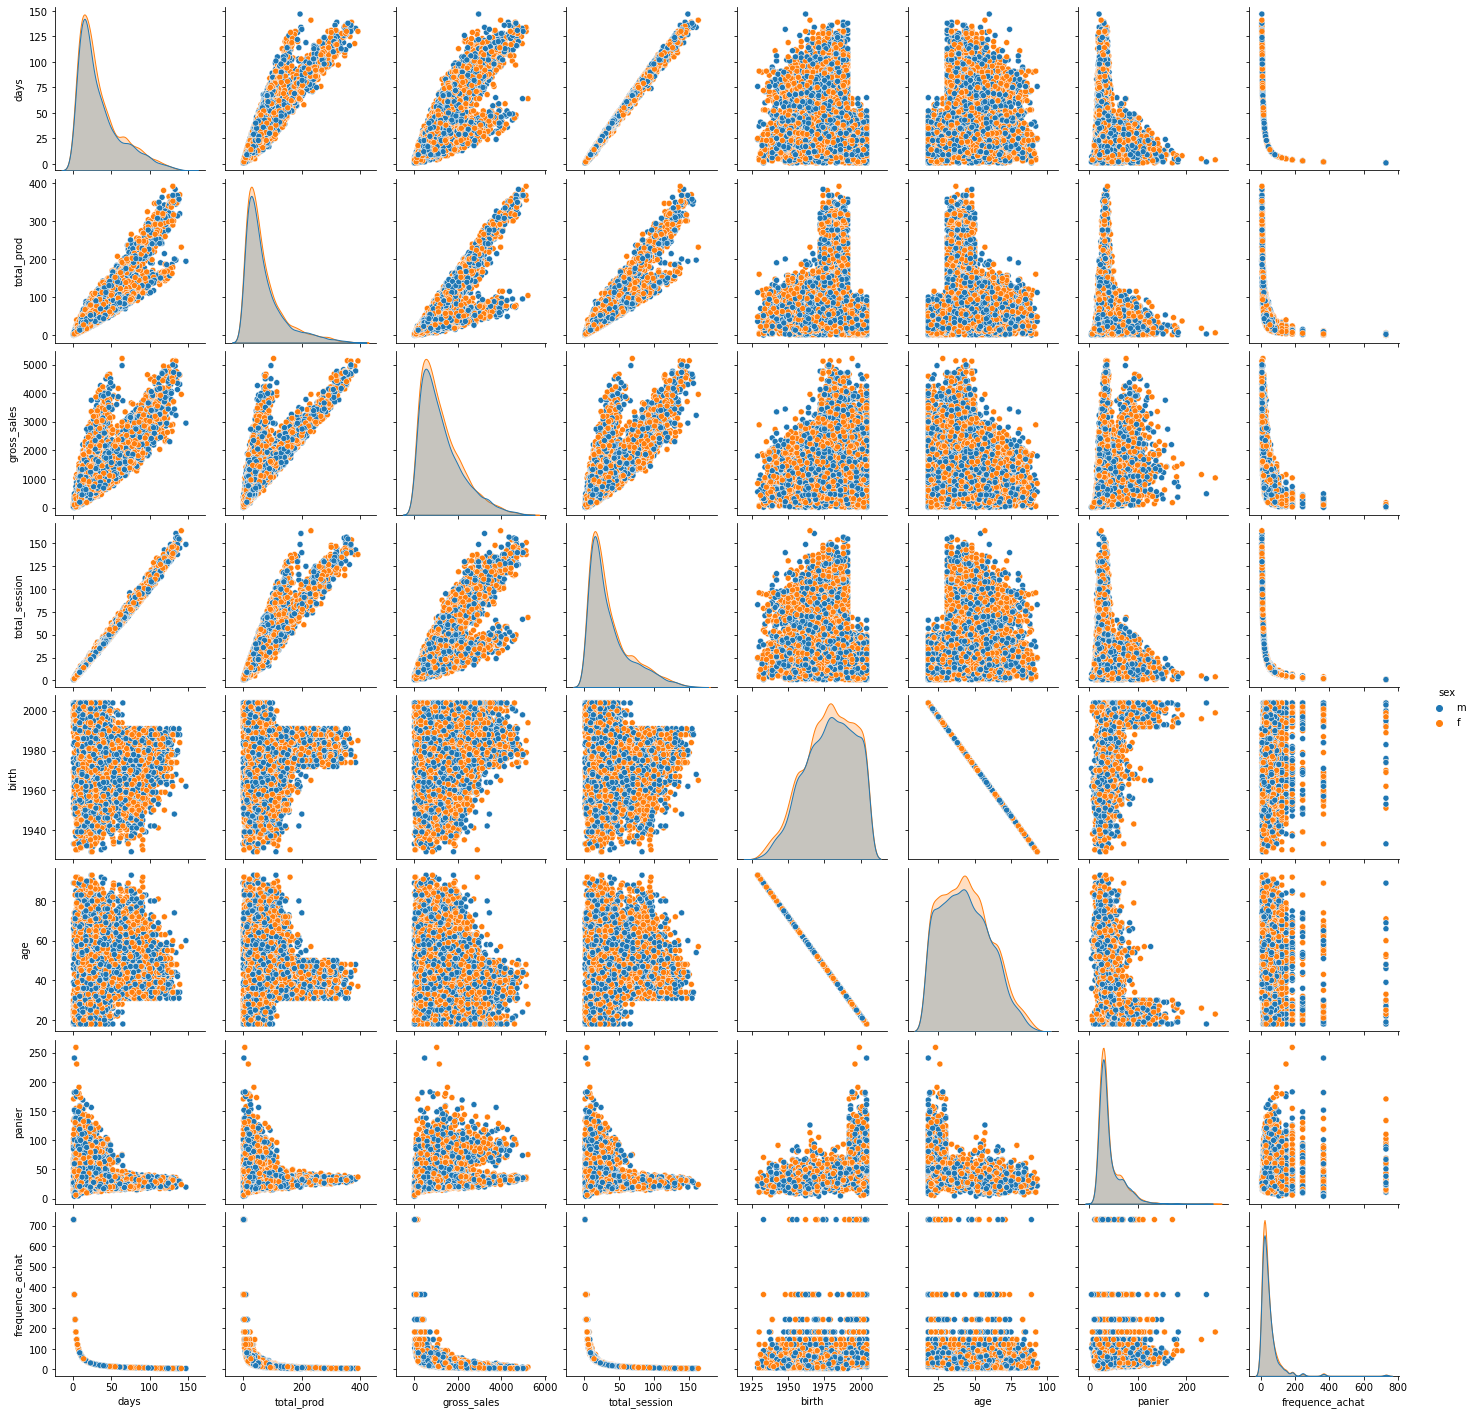

In [178]:
analyse_clients.corr(method ='pearson')

,nombre de jour d'achat,nombre de produit,CA,nombre de session,naissance,age,panier,frequence_achat
nombre de jour d'achat,1.000000,0.918140,0.821709,0.997539,-0.169307,0.169307,-0.309814,-0.477280
nombre de produit,0.918140,1.000000,0.835662,0.921339,-0.032864,0.032864,-0.227808,-0.421575
CA,0.821709,0.835662,1.000000,0.822631,0.183647,-0.183647,0.160460,-0.445891
nombre de session,0.997539,0.921339,0.822631,1.000000,-0.167585,0.167585,-0.307441,-0.466676
naissance,-0.169307,-0.032864,0.183647,-0.167585,1.000000,-1.000000,0.610064,0.118873
age,0.169307,0.032864,-0.183647,0.167585,-1.000000,1.000000,-0.610064,-0.118873
panier,-0.309814,-0.227808,0.160460,-0.307441,0.610064,-0.610064,1.000000,0.186881
frequence_achat,-0.477280,-0.421575,-0.445891,-0.466676,0.118873,-0.118873,0.186881,1.000000


**<u> CONCLUSION**
    
On peut tirer 2 observations du pairplot :  
* plus le délai entre 2 achats augmente, moins la dépense est importante
* le panier moyen diminue avec l'âge.   

## <a name="B22">9.3 - Corrélation CA - nombre de session</a> <a href="#C">§</a>

Le CA et le nombre de session sont 2 variables quantitatives, je vais donc visualiser leur corrélation par un scatterplot compléter d'**une régression linéaire et du calcul du coefficient de Pearson.**

In [179]:
x=analyse_clients[['CA']]
y=analyse_clients['nombre de session']
x = x.copy()
x['intercept'] = 1.
model = sm.OLS(y, x)
results = model.fit()
a,b = results.params['CA'],results.params['intercept']

In [180]:
print(a,b)

0.02637972504383767 3.114339876849418


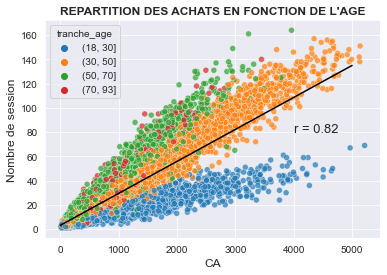

In [181]:
plt.title("REPARTITION DES ACHATS EN FONCTION DE L'AGE", fontsize=12,fontweight='bold')
sns.scatterplot(x='CA', y='nombre de session', data=analyse_clients,hue='tranche_age', alpha=0.7)
plt.plot(np.arange(5000),[a*x+b for x in np.arange(5000)], color='black')
plt.annotate('r = 0.82', xy=(4000, 80), xytext=(4000, 80), fontsize=13)
plt.xlabel('CA',fontsize=12)
plt.ylabel('Nombre de session',fontsize=12)
plt.savefig("corr_sess_age.png",dpi=300,bbox_inches ='tight');

In [182]:
st.pearsonr(analyse_clients['CA'], analyse_clients['nombre de session'])

(0.8226306567601023, 0.0)

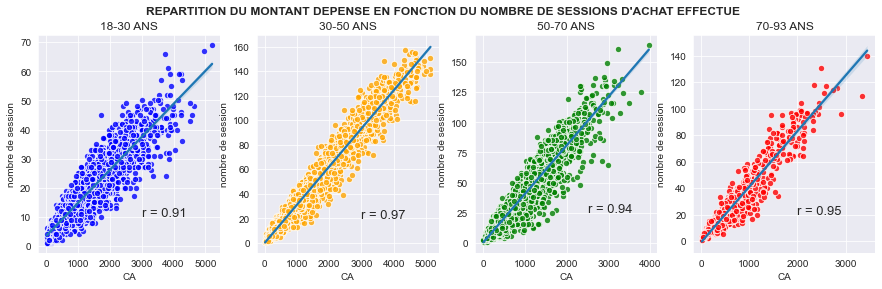

In [183]:
plt.figure(figsize =(15,4))
plt.suptitle("REPARTITION DU MONTANT DEPENSE EN FONCTION DU NOMBRE DE SESSIONS D'ACHAT EFFECTUE", fontsize=12,fontweight='bold')
plt.subplot(1,4,1).set_title('18-30 ANS')
plt.subplot(1,4,1).annotate('r = 0.91', xy=(3000, 10), xytext=(3000, 10), fontsize=13)
sns.regplot(x='CA', y='nombre de session', data=analyse_clients.loc[analyse_clients['age']<30], scatter_kws={'color': 'blue','s':40, 'edgecolor':'white'})
plt.subplot(1,4,2).set_title('30-50 ANS')
plt.subplot(1,4,2).annotate('r = 0.97', xy=(3000, 20), xytext=(3000, 20), fontsize=13)
sns.regplot(x='CA', y='nombre de session', data=analyse_clients.loc[(analyse_clients['age']>30) & (analyse_clients['age']<50)],scatter_kws={'color': 'orange','s':40, 'edgecolor':'white'})
plt.subplot(1,4,3).set_title('50-70 ANS')
plt.subplot(1,4,3).annotate('r = 0.94', xy=(2500, 25), xytext=(2500, 25), fontsize=13)
sns.regplot(x='CA', y='nombre de session', data=analyse_clients.loc[(analyse_clients['age']>50) & (analyse_clients['age']<70)],scatter_kws={'color': 'green','s':40, 'edgecolor':'white'})
plt.subplot(1,4,4).set_title('70-93 ANS')
plt.subplot(1,4,4).annotate('r = 0.95', xy=(2000, 20), xytext=(2000, 20), fontsize=13)
sns.regplot(x='CA', y='nombre de session', data=analyse_clients.loc[analyse_clients['age']>70],scatter_kws={'color': 'red','s':40, 'edgecolor':'white'})
plt.savefig("corr_sess_age_4.png",dpi=300,bbox_inches ='tight');

In [184]:
df_18_30=analyse_clients.loc[analyse_clients['age']<30]
st.pearsonr(df_18_30['CA'], df_18_30['nombre de session'])

(0.906183808149976, 0.0)

In [185]:
df_30_50=analyse_clients.loc[(analyse_clients['age']>30) & (analyse_clients['age']<50)]
st.pearsonr(df_30_50['CA'], df_30_50['nombre de session'])

(0.9733772830190991, 0.0)

In [186]:
df_50_70=analyse_clients.loc[(analyse_clients['age']>50) & (analyse_clients['age']<70)]
st.pearsonr(df_50_70['CA'], df_50_70['nombre de session'])

(0.9369831547782572, 0.0)

In [187]:
df_70_93=analyse_clients.loc[analyse_clients['age']>70]
st.pearsonr(df_70_93['CA'], df_70_93['nombre de session'])

(0.9476356516576986, 1.012321153739795e-287)

**<u>Conclusion**
    
Les 18-30 fractionnent moins leurs achats que les 30-50 et que les 50-93 ans.

## <a name="B24">9.4 -Corrélation tranche d'âge - catégorie</a> <a href="#C">§</a>

Les variables tranche_age et catégorie sont des qualitatives, je vais réaliser **un test d'indépendance de chi2.** 

In [188]:
# tableau de contingence Age-Catégorie
cont_AG=pd.crosstab(analyse_ventes['tranche_age'],analyse_ventes['categ'],margins=True,margins_name='Total')
cont_AG

categ,0,1,2,Total
tranche_age,,,,
"(18, 30]",12633,24090,26309,63032
"(30, 50]",304930,97584,1441,403955
"(50, 70]",62977,81325,1469,145771
"(70, 93]",12874,17047,278,30199
Total,393414,220046,29497,642957


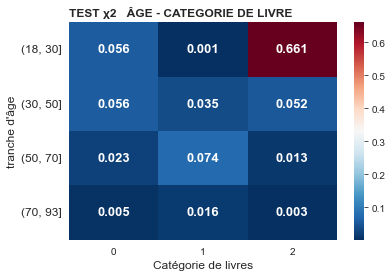

In [189]:
tx = cont_AG.loc[:,["Total"]]
ty = cont_AG.loc[["Total"],:]
n = len(analyse_ventes)
indep = tx.dot(ty) / n

c = cont_AG.fillna(0)                              
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=table.iloc[:-1,:-1],cmap='RdBu_r',fmt='.3f',annot_kws={'fontsize':13, 'fontweight':'bold'})

plt.xlabel('Catégorie de livres',fontsize=12,loc='center')               
plt.ylabel("tranche d'âge",fontsize=12)                                          
plt.yticks(rotation=0,fontsize=12)
plt.title("TEST χ2   ÂGE - CATEGORIE DE LIVRE", fontweight='bold', fontsize=12, loc='left')
plt.savefig("chi2_age_categ.png",dpi=300,bbox_inches ='tight');

In [190]:
st_chi2, st_p, st_dof, st_exp = st.chi2_contingency(cont_AG)

In [191]:
st_chi2

287118.83773917926

In [192]:
st_p

0.0

**<u>CONCLUSION :**

* <u>Hypothèses du test : 
    
Hypothèse H0 : pas d'influence d'une variable sur l'autre, donc indépendance des variables.  
Hypothèse H1 : influence d'une variable sur l'autre.
    
* p value < 0.05, donc H0 rejetée, les variables ne sont pas indépendantes l'une de l'autre.
* Le heatmap nous indique que l'influence la plus forte entre tranche d'âge et catégorie de livre  correspond à l'achat de catégorie 2 par les 18 -30 ans.

# <a name="A10">10 - Test de normalité</a> <a href="#C">§</a>

Il s'agit de vérifier que les variables étudiées suivent la loi normale. Dans un premier temps, je réalise une représentation graphique  : histogramme de distribution, puis je teste les variances et les moyennes.

### Test réalisé sur la clientèle selon les parmètres âge et genre.

In [193]:
customers.head()

,client_id,genre,naissance,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


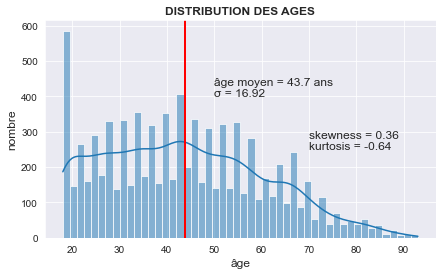

In [194]:
plt.figure(figsize = (7,4))
plt.title("DISTRIBUTION DES AGES", fontweight='bold', fontsize=12)
plt.xlabel('âge',fontsize=12)
plt.ylabel('nombre',fontsize=12)
xbar_age=(customers['age']).mean()
sns.histplot(x='age',bins=50, data=customers, kde=True)
plt.axvline(xbar_age, color='r', linewidth=2)
plt.annotate('âge moyen = 43.7 ans\nσ = 16.92',xy=(50,400),xytext=(50,400),fontsize=12)
plt.annotate('skewness = 0.36\nkurtosis = -0.64',xy=(70,250),xytext=(70,250),fontsize=12)
plt.savefig("normalite_age.png",dpi=300,bbox_inches ='tight');

In [195]:
customers['age'].mean()

43.71912327496231

In [196]:
customers['age'].std()

16.919535158523512

In [197]:
customers['age'].skew()
# distribution asymétrique, s'étalant vers les âges élevés, il y a de plus une limite d'âge à 18 ans.

0.36100192847210094

In [198]:
customers['age'].kurtosis()
# distribution étalée

-0.6368897975660262

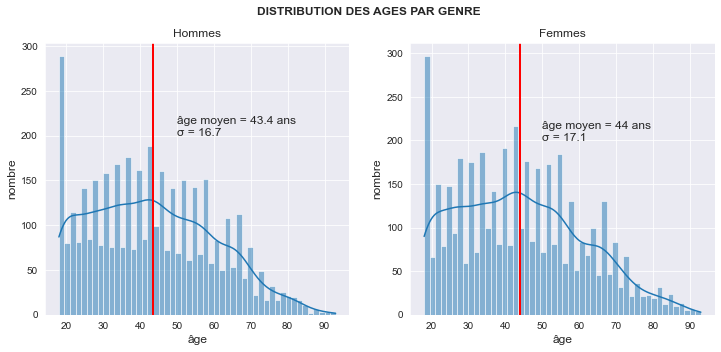

In [199]:
plt.figure(figsize =(12,5))
plt.suptitle("DISTRIBUTION DES AGES PAR GENRE", fontsize=12,fontweight='bold')

plt.subplot(1,2,1).set_title('Hommes',fontsize=12)
data_m=customers.loc[customers['genre']=='m']
xbar_m=(data_m['age']).mean()
sns.histplot(x='age',bins=50, data=data_m, kde=True)
plt.xlabel('âge',fontsize=12)
plt.ylabel('nombre',fontsize=12)
plt.subplot(1,2,1).axvline(xbar_m, color='r', linewidth=2)
plt.subplot(1,2,1).annotate('âge moyen = 43.4 ans\nσ = 16.7',xy=(50,200),xytext=(50,200),fontsize=12)

plt.subplot(1,2,2).set_title('Femmes',fontsize=12)
data_f=customers.loc[customers['genre']=='f']
xbar_f=(data_f['age']).mean()
sns.histplot(x='age', bins=50, data=data_f, kde=True)
plt.xlabel('âge',fontsize=12)
plt.ylabel('nombre',fontsize=12)
plt.subplot(1,2,2).axvline(xbar_f, color='r', linewidth=2)
plt.subplot(1,2,2).annotate('âge moyen = 44 ans\nσ = 17.1',xy=(50,200),xytext=(50,200),fontsize=12)
plt.savefig("normalite_age_genre.png",dpi=300,bbox_inches ='tight');

In [200]:
xbar_m=(data_m['age']).mean()
round(xbar_m,1)

43.4

In [201]:
xbar_f=(data_f['age']).mean()
round(xbar_f,1)

44.0

In [202]:
std_m=(data_m['age']).std()
round(std_m,1)

16.7

In [203]:
std_f=(data_f['age']).std()
round(std_f,1)

17.1

In [204]:
# Test de Bartlett sur les variances
st.bartlett(customers.loc[customers['genre']=='f']['age'], customers.loc[customers['genre']=='m']['age'])

BartlettResult(statistic=2.155500895804273, pvalue=0.1420601091347948)

p values > 0.05 , les variances des 2 populations sont égales.
On peut faire le test de Student sur les moyennes.

In [205]:
# Test de Student
st.ttest_ind(customers.loc[customers['genre']=='f']['age'], customers.loc[customers['genre']=='m']['age'])

Ttest_indResult(statistic=1.636581055171711, pvalue=0.10175453792301446)

**<u>CONCLUSION :**

* <u>Hypothèses du test : 

Hypothèse H0 = les 2 moyennes sont égales, donc il n'y pas d'influence du genre sur la distribution de l'âge des 2 populations.  
    Hypothèse H1 = les 2 moyennes sont différentes, donc il y a influence du genre sur la distribution de l'âge des 2 populations. 

* p values > 0.05, donc on ne rejette pas H0.  
* Il n'y a donc pas d'influence du genre sur la distribution de l'âge des 2 populations.